# <img src="uni-logo.png" alt="Logo UNI" width=100 hight=200 align="right">


<br><br><br>
<h1><font color="#7F000E" size=5>Sistemas Inteligentes</font></h1>
<h1><font color="#7F000E" size=4>Capstone I</font></h1>
<br>
<font color="#7F000E" size=3>
Por:
<ul>
    <li>Tejada Villagaray, Luis</li>
</ul>
</font>

<h1><font color="#7F000E" size=3>Exploración sobre la base de datos de películas</font></h1>

<br>
<div style="text-align: right">
<font color="#7F000E" size=3>Facultad de Ciencias</font><br>
<font color="#7F000E" size=3>Maestria en Ciencia de la Computación</font><br>
</div>

En un proyecto anterior se partió de dos conjuntos de datos, sobre películas y valoraciones hechas a las mismas, disponibles en _Internet Movie Database (IMDB)_. Esta información se enriqueció con datos adicionales obtenidos mediante consultas a la API de otro sitio, _The Movie Database (TMDB)_. Como resultado de este proceso, se generaron  tres conjuntos de datos: `df_movies`, con información sobre películas, géneros, y valoraciones;  `df_people`, con información sobre las personas; y `df_credits` con información sobre las personas que participan en cada película (director y tres actores principales). A partir de éstos, se llevará a cabo un análisis exploratorio.
  
El modo en que se desarrolla el análisis depende en gran medida _de los datos disponibles_ y de unos _objetivos_ que pueden ser generales o la respuesta a cuestiones concretas, y que pueden variar o ampliarse en función de los resultados intermedios que vaya arrojando el proceso. En este proyecto se partirá de una situación hipotética inicial en la que se estudian las condiciones para la inversión en una película de _presupuesto relativamente bajo_. Para ello, se han analizar qué factores tienen más incidencia en el éxito de una película, que consideraremos que puede cuantificarse por los ingresos que ha obtenido, o por el número de votos y valoración en _IMDB_. También se estudiarán las diferencias entre géneros con el fin de seleccionar los más adecuados, y se analizará la relevancia de directores, actores, y actrices, y cuales podrían ser los más adecuados. Además, y paralelamente, se obtendrá información adicional que, si bien puede no estár relacionada con el objetivo principal, puede resultar de interés. 

Para llevar a cabo la exploración, se propondrán una serie de ejercicios que consisten en la obtención de gráficas o datos concretos. En algunos casos, vosotros tendréis que decidir qué gráfica es adecuada, y habrá que interpretarla. Por último, este proyecto no tiene porqué ceñirse a la resolución de los ejercicios, sino que cabe la posibilidad de dar respuesta a cuestiones distintas a las propuestas en la libreta.

---

<a id="inicio"></a>
<h2><font color="#7F000E" size=5>Índice</font></h2>


* [1. Exploración inicial](#section1)
  * [1.1 Primera exploración sobre el conjunto de datos `df_movies`](#section11)
* [2. Presupuesto](#section2)
  * [2.1 Presupuesto / ingresos](#section21)
  * [2.2 Fecha de estreno como factor de interés](#section22) 
* [3 Géneros](#section3)  
  * [3.1 Información por género](#section31) 
  * [3.2 Películas de bajo presupuesto](#section32)  
* [4 Personas](#section4)  
  * [4.1 Directores](#section41)
  * [4.2 Reparto](#section42) 
* [5. Conclusión](#section5)
* [6. Trabajo adicional (optativo)](#section6)

---

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()

# Optimiza los gráficos para pantalla retina
%config InlineBackend.figure_format = 'retina'
# Por defecto usamos el backend inline
%matplotlib inline

# La libreta ocupa así el 95% de la pantalla
#from IPython.core.display import display, HTML //Deprecation Warning!!
#display(HTML("<style>.container { width:95% !important; }</style>")) //Deprecation Warning!!
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---

<a id="section1"></a>
## <font color="#7F000E"> 1. Exploración inicial</font>
<br>

El primer paso en el análisis exploratorio consiste en obtener una primera descripción del conjunto de datos como tal, y que incluye aspectos como: archivos; características, relaciones entre ellas, significado y tipos de datos con que se representan; existencia o frecuencia de valores perdidos, etc. A continuación se lee y se muestra la cabecera de cada uno de los tres *DataFrame*, y se inspecciona su estructura.

In [2]:
df_movies = pd.read_csv('data/df_movies.csv', index_col='movie_id', sep=';', parse_dates=['release_date'])
df_movies.head(2)

,title,genres,avg_rating,num_votes,budget,revenue,release_date,original_language,popularity,keywords
movie_id,,,,,,,,,,
tt0010323,The Cabinet of Dr. Caligari,"Fantasy,Horror,Mystery",8.1,56655,18000,8811,1920-02-27,de,8.803,"insane asylum,black and white,silent film,unre..."
tt0012349,The Kid,"Comedy,Drama,Family",8.3,111315,250000,2500000,1921-01-21,en,11.140,"angel,suicide attempt,fistfight,slapstick,clas..."


In [3]:
df_credits = pd.read_csv('data/df_credits.csv', index_col='movie_id', sep=';')
df_credits.head(2)

,people_id,rol
movie_id,,
tt0010323,2991,director
tt0012349,13848,director


In [4]:
df_people = pd.read_csv('data/df_people.csv', index_col='people_id', sep=';')
df_people.head(2)

,name,popularity,imdb_id,gender
people_id,,,,
2991,Robert Wiene,0.600,nm0927468,2
13848,Charlie Chaplin,3.607,nm0000122,2


Puede observarse que prácticamente no existen valores perdidos en el conjunto de datos, por lo que no es necesario hacer ningún tipo de preprocesamiento, ni adaptar el proceso de exploración a esta circunstancia. 

In [5]:
df_movies.info()
df_credits.info()
df_people.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3366 entries, tt0010323 to tt9484998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              3366 non-null   object        
 1   genres             3366 non-null   object        
 2   avg_rating         3366 non-null   float64       
 3   num_votes          3366 non-null   int64         
 4   budget             3366 non-null   int64         
 5   revenue            3366 non-null   int64         
 6   release_date       3366 non-null   datetime64[ns]
 7   original_language  3366 non-null   object        
 8   popularity         3366 non-null   float64       
 9   keywords           3350 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 289.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 13681 entries, tt0010323 to tt9484998
Data columns (total 2 columns):
 #   Column     Non-Null Co

<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---

<a id="section11"></a>
### <font color="#7F000E">1.1 Primera exploración sobre el conjunto de datos `df_movies` </font>
<br>

El *DataFrame* `df_movies` es el núcleo del conjunto de datos, y entorno al cual debe desarrollarse la exploración. Contiene información identificativa, cualitativa, y cuantitativa sobre cada película.  Se comenzará por analizar esta última, ya que incluye las variables relacionadas directamente con el _éxito_, que es el objetivo del análisis. Como punto de partida se visualizarán las variables `avg_rating`, `num_votes`, `revenue`, y `popularity`, así como relaciones entre ellas. Existen varios modos de hacerlo, pero *seaborn* permite mostrar toda la información en un solo gráfico.


#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 1</font> 
Generar un figura con una matriz de gráficas en las que se muestre, para cada par de variables, una gráfica de dispersión; y para cada variable, un histograma.  Esta figura se puede hacer de manera sencilla mediante `seaborn.pairplot()` o `seaborn.PairGrid`. Debido a que el conjunto de datos contiene información sobre más de 3000 películas, es necesario hacer ciertos ajustes sobre las gráficas de dispersión, como por ejemplo utilizar un tamaño reducido o transparencia para las marcas.


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> En este caso, también es posible visualizar la información mediante funciones de densidad (`kde`). Por otra parte, es posible pasar argumentos a las gráficas de la diagonal con el diccionario `diag_kws={'arg1':value1, 'arg2':value2,...}`; y a las gráficas bivariadas mediante el diccionario `plot_kws={'arg1':value1, 'arg2':value2,...}`.
</div>




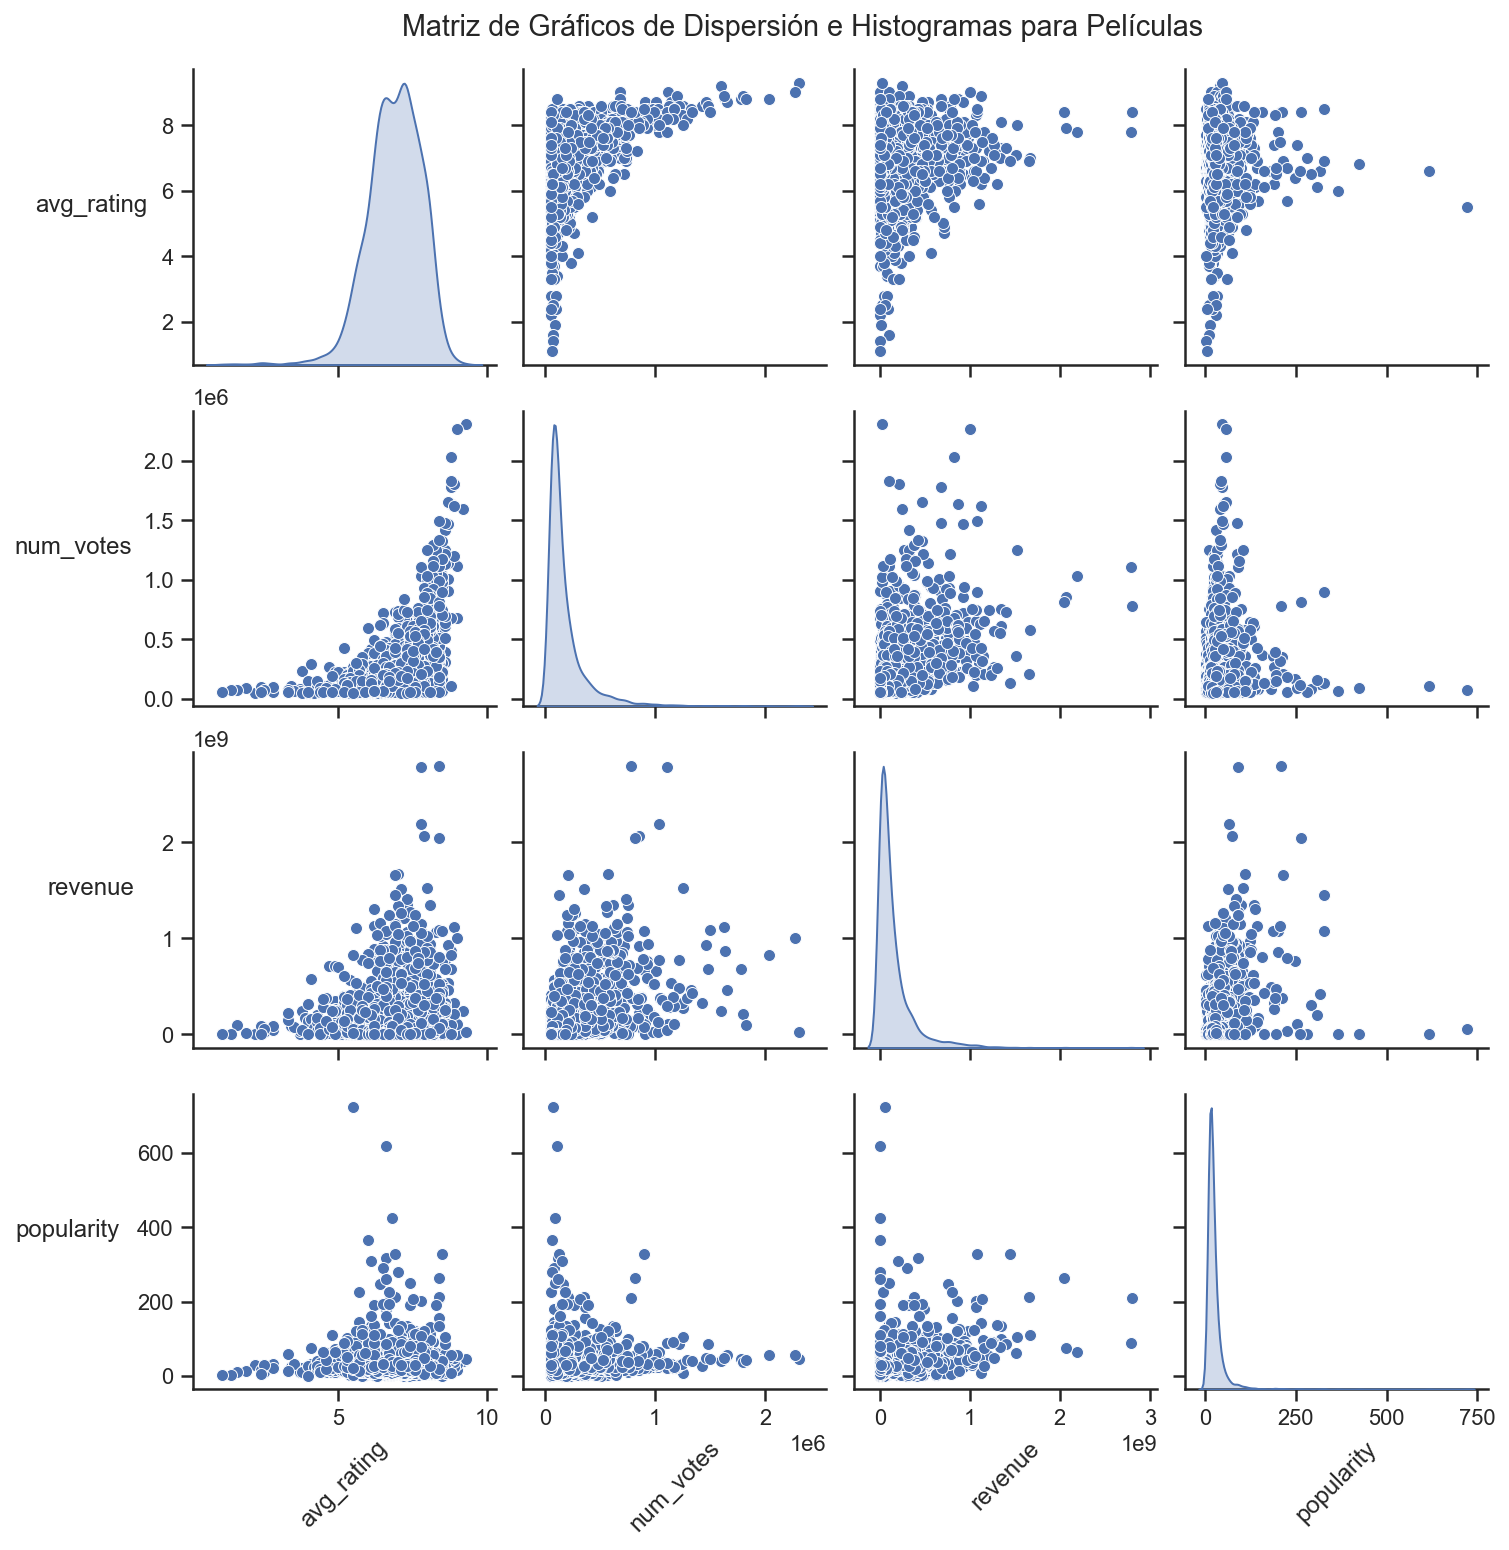

In [6]:
# Columnas relativas a la valoración
success_meas = ['avg_rating','num_votes', 'revenue', 'popularity']

# Filtrar el conjunto de datos para incluir solo las columnas seleccionadas
data_subset = df_movies[success_meas]

# Personalizar el tamaño de la figura y la transparencia de las marcas
sns.set(style="ticks")
sns.set_context("notebook", rc={"axes.labelsize": 12})

# Crear una matriz de gráficos utilizando pairplot
pairplot = sns.pairplot(data_subset, diag_kind="kde", markers="o", palette="husl")

# Añadir títulos a los gráficos
pairplot.fig.suptitle("Matriz de Gráficos de Dispersión e Histogramas para Películas", y=1.02)

# Ajustar los títulos de los ejes para los histogramas diagonales
for ax in pairplot.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), rotation=45)
    ax.set_ylabel(ax.get_ylabel(), rotation=0, labelpad=35)

plt.show()




La gráfica anterior muestra que los valores de algunas variables (`num_votes`, `revenue`, y `popularity`) están muy sesgados, de modo que la mayoría se situan en la parte más baja del rango. Aún así, se perciben ciertas tendencias y relaciones entre `num_votes` y `revenue`, aunque no muy fuertes. En el caso de la variable `popularity`, sin embargo, existen _outliers_ que dificultan la visión tanto del histograma correspondiente como de las gráficas de dispersión.  En primer lugar, se van a estudiar esos puntos anómalos. Para ello, es necesario fijar un umbral que determine cuáles son estos puntos.

#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 2</font> 
Utilizando el método `Series.quantile()` mostrar los cuantiles 95%, 99%, 99.5% y 99.9%, de la columna `popularity`,y almacenar el resultado en `pct_popularity` (una *Serie*).

In [7]:
# Calcular los cuantiles
quantiles = [0.95, 0.99, 0.995, 0.999]
pct_popularity = data_subset['popularity'].quantile(quantiles)

# Creando una Serie para almacenar los resultados
pct_popularity = pd.Series(pct_popularity)

print(pct_popularity)

0.950     60.917750
0.990    141.732050
0.995    212.712975
0.999    352.957195
Name: popularity, dtype: float64


Puede observarse que, incluso por encima del cuantil 99, hay una gran diferencia entre los indicadores de popularidad. Para elegir el umbral que marca los *outliers* es útil visualizar la distribución de `popularity` con algo más de detalle. 


#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 3</font> 

 Mostrar el histograma y la función de densidad de esta variable. Cambiar el aspecto (incrementar el ancho de la figura resultante) para poder distinguir mejor los matices en la gráfica. 

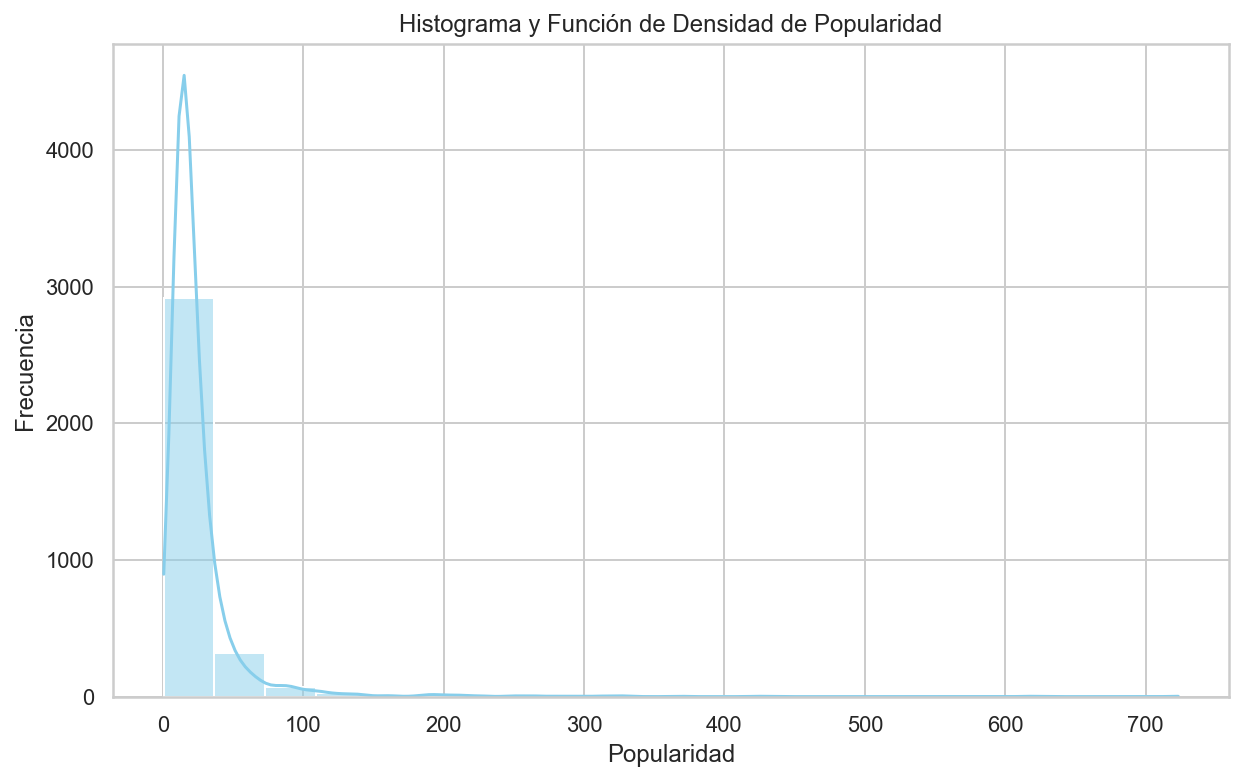

In [8]:
# Configurar el estilo de seaborn y el tamaño de la figura
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Muestra el histograma
sns.histplot(data_subset['popularity'], kde=True, color='skyblue', bins=20)

# Agrega etiquetas y título
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.title('Histograma y Función de Densidad de Popularidad')

# Muestra la gráfica
plt.show()

El valor correspondiente al cuantil 95% (60.92) no se aleja excesivamente de la media. Sin embargo, el cuantil 99% (141.73) se aleja demasiado del resto. Por tanto, se escogerá este cuantil, que se ha de almacenar en la variable `pop_outlier_val`.

In [9]:
pop_outlier_val = pct_popularity.at[0.99]
pop_outlier_val

141.73205

La aparición de *outliers* puede deberse a tres causas: errores, valores atípicos que pueden descartarse, o valores atípicos que son relevantes de cara al análisis. Como por definición, el número de *outliers* es relativamente bajo, la mejor forma de comprobar su naturaleza es observarlos de manera individual. 

#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 4</font> 

Mostrar las entradas de `df_movies` correspondientes a `outliers` de la columna `popularity` (`popularity > pop_outlier_val`). Ordenarlas descendientemente según el valor de esta columna. 

In [10]:
outliers_df = df_movies[df_movies['popularity'] > pop_outlier_val]

# Ordenar el DataFrame resultante por 'popularity' en orden descendente
outliers_df = outliers_df.sort_values(by='popularity', ascending=False)

# Mostrar las entradas correspondientes a outliers
print(outliers_df[['budget','release_date','avg_rating', 'revenue', 'popularity']])

               budget release_date  avg_rating     revenue  popularity
movie_id                                                              
tt4566758   200000000   2020-09-04         5.5    57000000     723.229
tt7846844    21000000   2020-09-23         6.6           0     617.508
tt13143964          0   2020-10-23         6.8           0     425.188
tt7550000           0   2020-08-14         6.0           0     367.067
tt7286456    55000000   2019-10-02         8.5  1074251311     328.410
tt4520988   150000000   2019-11-20         6.9  1450026933     328.188
tt1502397    90000000   2020-01-15         6.6   419074646     317.156
tt7713068    75000000   2020-02-05         6.1   201858461     309.186
tt3794354    85000000   2020-02-12         6.5   306766470     290.833
tt6048922    50300000   2020-07-10         7.0           0     279.493
tt4154756   300000000   2018-04-25         8.4  2046239637     264.727
tt7556122    70000000   2020-07-10         6.6           0     262.189
tt7146

En este caso, el conocimiento de los datos permite intuir que la mayoría de las películas para las que el valor de la columna `popularity` es extremadamente alto, son conocidas y de alto presupuesto. Llama la atención también un fenómeno, y es que gran parte de ellas se estrenaron el año pasado o éste. Esto lleva a pensar si la popularidad está relacionada con una mayor actividad en el sitio web, fruto del uso cada vez más intensivo de las redes sociales.

Otro hecho que puede observarse es que el valor del presupuesto o de los beneficios para algunas películas es cero. Esto puede suponer un problema a la hora de extraer algunos estadísticos. Puesto que el objetivo que se ha marcado está relacionado con el beneficio, se seleccionarán solo aquellas películas en las que aparecen tanto el presupuesto como los beneficios antes de seguir con el análisis.

In [11]:
df_movies = df_movies[(df_movies['budget']>0)&(df_movies['revenue']>0)]

#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 5</font> 

Aunque a priori no parece conveniente eliminar las películas con valores altos en `popularity`, impiden la correcta visualización de los datos. Puede repetirse la gráfica anterior, pero descartando las filas correspondientes a estos valores (sin eliminarlos del *DataFrame* `df_movies`).

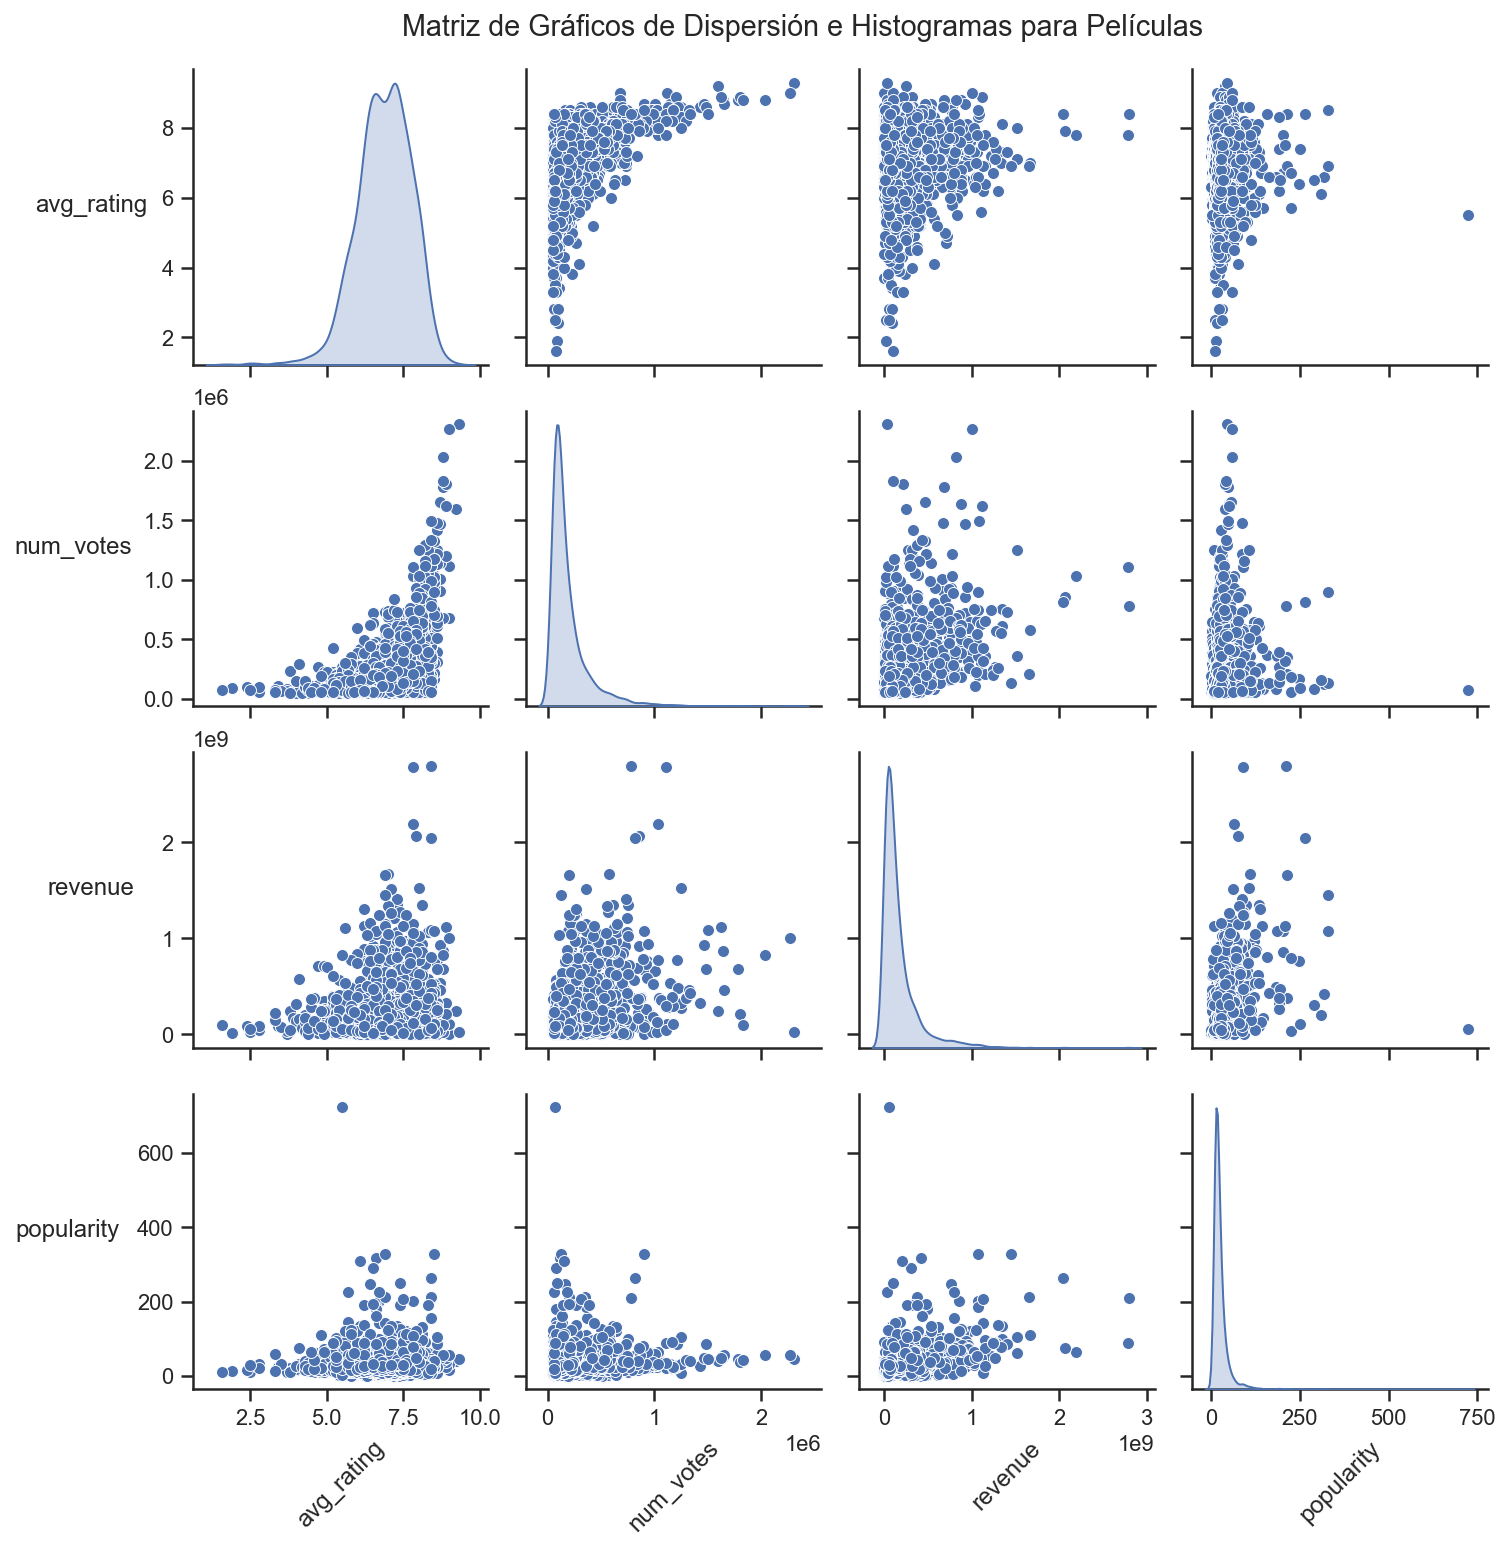

In [12]:
# Columnas relativas a la valoración
success_meas = ['avg_rating','num_votes', 'revenue', 'popularity']

# Filtrar el conjunto de datos para incluir solo las columnas seleccionadas
data_subset = df_movies[success_meas]

# Personalizar el tamaño de la figura y la transparencia de las marcas
sns.set(style="ticks")
sns.set_context("notebook", rc={"axes.labelsize": 12})

# Crear una matriz de gráficos utilizando pairplot
pairplot = sns.pairplot(data_subset, diag_kind="kde", markers="o", palette="husl")

# Añadir títulos a los gráficos
pairplot.fig.suptitle("Matriz de Gráficos de Dispersión e Histogramas para Películas", y=1.02)

# Ajustar los títulos de los ejes para los histogramas diagonales
for ax in pairplot.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), rotation=45)
    ax.set_ylabel(ax.get_ylabel(), rotation=0, labelpad=35)

plt.show()

El descarte de los *outliers* permite ver ahora todas las gráficas con claridad. Parece que `num_votes` y `revenue` se comportan de manera con respecto a `popularity`, y que existe algo de relación con esta variable. Se aprecia que también que `avg_rating` se comporta de manera distinta, y que la relación es prácticamente nula. En cualquier caso, debido al gran número de puntos, y aunque se pueden intuir algunas tendencias, es difícil establecer hacer una valoración clara. En este caso, el coeficiente de correlación entre las variables puede ser proporcionar una visión más precisa. 


#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 6</font> 

Obtener el coeficiente de correlación entre los pares de variables utilizando el método `DataFrame.corr()`. Repetir la operación para los datos con y sin _outliers_ (en `popularity`) y comparar.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> `DataFrame.corr()` devuelve, a su vez, un *DataFrame*. El método `DataFrame.style.background_gradient()` muestra el conjunto de datos resultante con colores que facilitan su interpretación. 
</div>

Muestra la correlación incluyendo los *outliers*.

In [13]:
# Columnas relativas a la valoración
success_meas = ['avg_rating','num_votes', 'revenue', 'popularity']

# Calcular el coeficiente de correlación solo para las columnas seleccionadas
correlation_matrix = df_movies[success_meas].corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

            avg_rating  num_votes   revenue  popularity
avg_rating    1.000000   0.458906  0.062786    0.006560
num_votes     0.458906   1.000000  0.499672    0.236385
revenue       0.062786   0.499672  1.000000    0.491974
popularity    0.006560   0.236385  0.491974    1.000000


Muestra la correlación descartando los *outliers*.

In [14]:
df_movies_sin_outliers = df_movies[df_movies['popularity'] < pop_outlier_val]

# Calcular el coeficiente de correlación solo para las columnas seleccionadas
correlation_matrix_sin_outliers = df_movies_sin_outliers[success_meas].corr()

# Mostrar la matriz de correlación
print(correlation_matrix_sin_outliers)

            avg_rating  num_votes   revenue  popularity
avg_rating    1.000000   0.455814  0.048658    0.006321
num_votes     0.455814   1.000000  0.510424    0.356672
revenue       0.048658   0.510424  1.000000    0.581335
popularity    0.006321   0.356672  0.581335    1.000000


<br>
Los datos obtenidos muestran algunos factores de interés:

* Cuando se consideran todas las películas, la correlación más alta se da entre el número de votos (`num_votes`) y los ingresos de la película (`revenue`), lo cual es esperable: cuanta más gente ve una película, más gente tiende a votarla. La correlación entre la valoración de la película (`avg_rating`) y los ingresos (`revenue`) es nula. Esto hace pensar que la gente va a ver las películas por la promoción y la espectativa que levantan, independientemente de las críticas o las valoraciones. 


* Si se eliminan los _outliers_ de `popularity`, la relación entre esta variable y las demás cambia ligeramente. En concreto la popularidad ( `popularity`) parece relacionada de manera más fuerte con los ingresos (`revenue`).


* La valoración (`avg_rating`)  tiene cierta relación positiva con el número de votos (`num_votes`). Parece que la gente tiende a votar para expresar una valoración positiva.

Llegado a este punto, y considerando el objetivo inicial del estudio, nos centraremos principalmente en la variable `revenue` para medir la repercusión de la película (es proporcional a la gente que la ha visto), aunque también se estudiarán en algunos casos la valoración y número de votos.

<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---


<a id="section2"></a>
## <font color="#7F000E"> 2. Presupuesto  </font>
<br>

El presupuesto de las películas (`budget`) podría tener una incidencia definitiva en su difusión y, por tanto, en su éxito. Por ello se va a estudiar su relación con algunas de las variables anteriores. 




#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 7</font> 

Obtener la correlación de `budget` con las variables `avg_rating`, `num_votes`, `revenue`, y `popularity`. 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> A menos que se indique explícitamente, se trabajará con el conjunto de datos completos (sin eliminar _outliers_).
</div>

In [15]:
# Columnas relativas a la valoración
success_meas = ['budget','avg_rating','num_votes', 'revenue', 'popularity']

# Calcular el coeficiente de correlación solo para las columnas seleccionadas
correlation_matrix = df_movies[success_meas].corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

              budget  avg_rating  num_votes   revenue  popularity
budget      1.000000   -0.162953   0.293291  0.710270    0.415269
avg_rating -0.162953    1.000000   0.458906  0.062786    0.006560
num_votes   0.293291    0.458906   1.000000  0.499672    0.236385
revenue     0.710270    0.062786   0.499672  1.000000    0.491974
popularity  0.415269    0.006560   0.236385  0.491974    1.000000


Efectivamente, el presupuesto tiene una correlación relativamente alta con los ingresos, a pesar de no tenerla (incluso es negativa) con las valoraciones. Esto refleja la importancia de la promoción. También que las valoraciones tienden a ser más bajas (muy ligeramente) para películas de alto presupuesto (¿el público exige más?). 

<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---

<a id="section21"></a>
### <font color="#7F000E">2.1 Presupuesto / ingresos </font>

Los datos anteriores mostraban que la correlación entre el presupuesto (`budget`) y los ingresos (`revenue`) es positiva. Es posible estudiar con más en detalle esta relación. Un recurso interesante en este sentido es un gráfico de tipo `sns.joinplot()`, que dibuja una gráfica de dispersión de las dos variables, la distribución marginal de cada una de ellas y,  mediante el parámetro `kind='reg'` puede añadir la recta correspondiente a un modelo de regresión. 



#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 8</font> 

 Construir y analizar una gráfica `sns.joinplot()` con una recta de regresión entre las variables `budget` y `revenue`. 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>  La misma funcionalidad se puede conseguir con `sns.PairGrid()` para todos los pares de variables. Este tipo de gráficas permite pasar argumentos a la gráfica de dispersión. Cuando `kind='reg'`, se puede hacer mediante `scatter_kws={'s':5, 'alpha':0.2}` haría que se dibujen los puntos con tamaño 5 y un gran nivel de transparencia.
</div>


<Figure size 864x864 with 0 Axes>

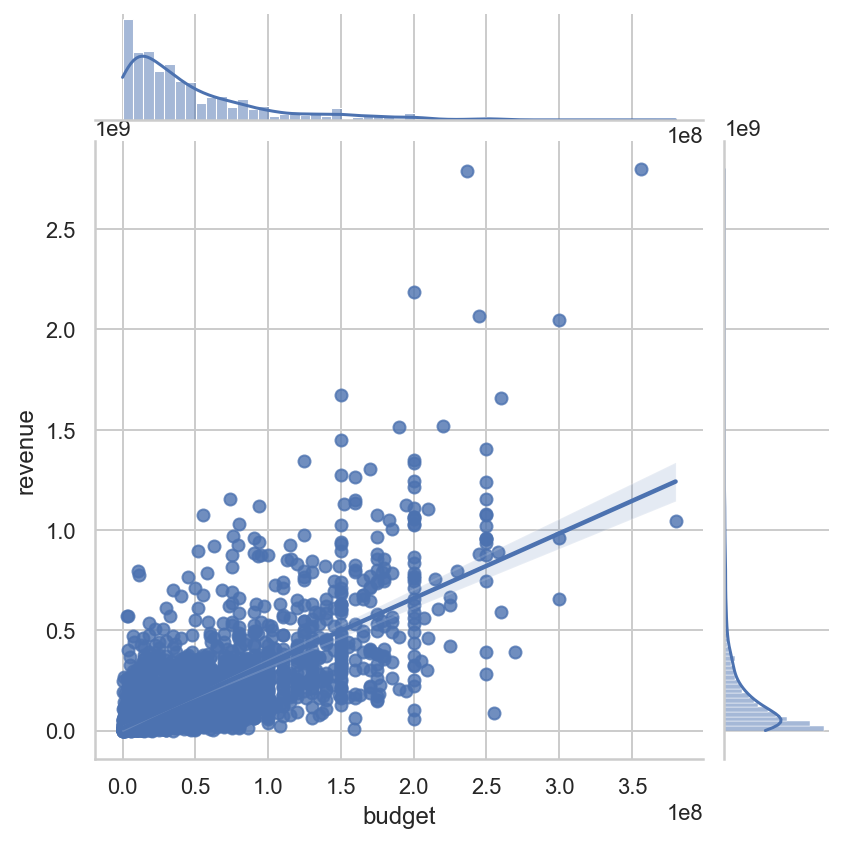

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 12))

sns.jointplot(x='budget', y='revenue', data=df_movies, kind='reg')

plt.show()

Con respecto al modelo se puede apreciar que no es informativo. Por una parte, está condicionado por los valores extremos de  `revenue`. Por otra, parece que la varianza en esta variable (y en los residuos) aumenta cuando lo hace `budget` (no se da la homocedasticidad). 

    
#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 9</font> 

 Comprobar esta circunstancia con una gráfica de tipo `sns.residplot()`.

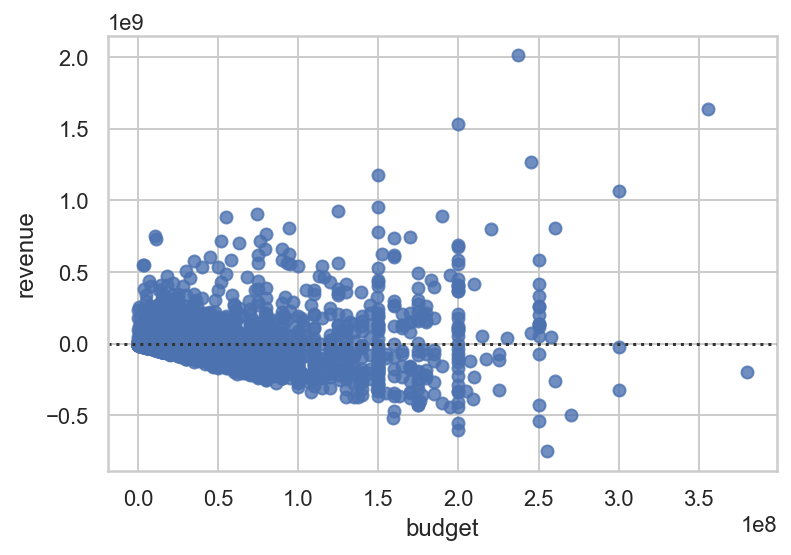

In [17]:
sns.residplot(x='budget', y='revenue', data=df_movies)

plt.show()

En la gráfica se aprecia que existe cierta correlación positiva entre las dos variables. Llama la atención que existen varios puntos que rompen claramente las tendencias, ya que existen varias películas que obtuvieron unos ingresos significativamente por encima de las demás, además de algún fracaso que, pese al presupuesto, no generó ingresos.


#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 10</font> 

 Obtener la información relativa a las cinco películas con más ingresos.

In [18]:
top_5_movies = df_movies.nlargest(5, 'revenue').copy()

print(top_5_movies)

                                                title  \
movie_id                                                
tt4154796                           Avengers: Endgame   
tt0499549                                      Avatar   
tt0120338                                     Titanic   
tt2488496  Star Wars: Episode VII - The Force Awakens   
tt4154756                      Avengers: Infinity War   

                             genres  avg_rating  num_votes     budget  \
movie_id                                                                
tt4154796    Action,Adventure,Drama         8.4     781527  356000000   
tt0499549  Action,Adventure,Fantasy         7.8    1109575  237000000   
tt0120338             Drama,Romance         7.8    1033484  200000000   
tt2488496   Action,Adventure,Sci-Fi         7.9     851657  245000000   
tt4154756   Action,Adventure,Sci-Fi         8.4     814078  300000000   

              revenue release_date original_language  popularity  \
movie_id            

<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---

<a id="section22"></a>
### <font color="#7F000E">2.2 La fecha de estreno como factor de interés </font>
<br>

Aunque la correlación entre presupuesto y los ingresos corresponde con lo que cabe esperarse (más presupuesto implica también más publicidad), hay que considerar que ambos factores dependen fuertemente del año de estreno, ya que se están manejando datos que corresponden a épocas distintas. Para tener una idea de la importancia de este factor, es necesario visualizar como evolucionan ambas cantidades a lo largo de los años.

#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 11</font> 

 Agrupar las películas en función del año de estreno, y calcular la media de presupuesto e ingresos para cada grupo. Para ello, utilizaremos la función `groupby`, y se almacenará el resultado (la media para `budget` y para `revenue` de cada año) en un *DataFrame* al que llamaremos `df_bud_rev_year`.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> Los valores de tipo `TimeStamp` tienen un campo, denominado `year` que contiene el año. Mediante `df_movies['release_date'].dt.year` se puede acceder a (y agrupar por) este campo. 
</div>

In [19]:
grouped = df_movies.groupby(df_movies['release_date'].dt.year)[['budget', 'revenue']].mean()

grouped.columns = ['media_presupuesto', 'media_ingreso']

df_bud_rev_year = grouped.sort_index(ascending=False)

df_bud_rev_year.head()

,media_presupuesto,media_ingreso
release_date,,
2020,8.791667e+07,1.469419e+08
2019,8.290990e+07,3.527722e+08
2018,6.887741e+07,2.843093e+08
2017,7.242558e+07,2.992173e+08
2016,6.181846e+07,2.087178e+08


#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 12</font> 

 Dibujar la gráfica (`plt.plot` o `sns.lineplot()`) a partir de la información (dos columnas) que contiene el `DataFrame` `df_bud_rev_year`.

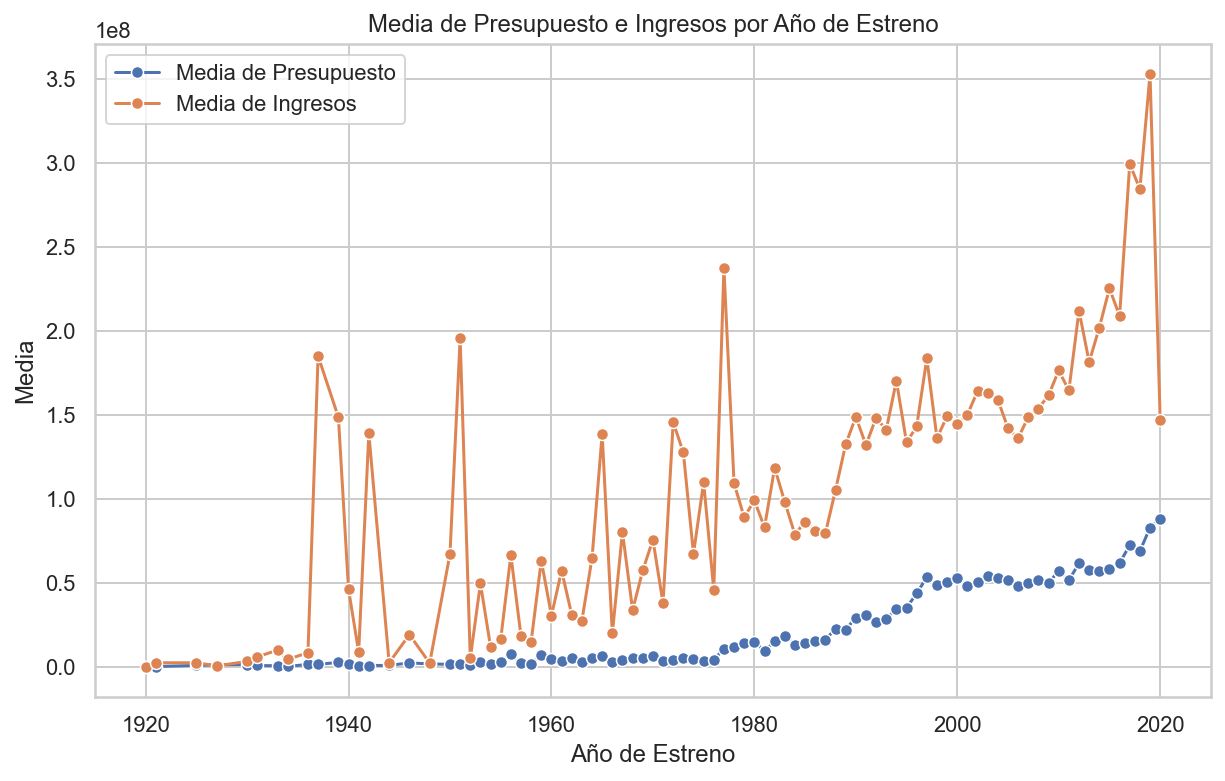

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_bud_rev_year, x='release_date', y='media_presupuesto', label='Media de Presupuesto', marker='o')
sns.lineplot(data=df_bud_rev_year, x='release_date', y='media_ingreso', label='Media de Ingresos', marker='o')

# Etiquetas de los ejes y título
plt.xlabel('Año de Estreno')
plt.ylabel('Media')
plt.title('Media de Presupuesto e Ingresos por Año de Estreno')

# Leyenda
plt.legend()

# Muestra la gráfica
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> Estas gráficas se podrían hacer directamente, sin utilizar la agrupación, y sin reordenar los datos, mediante dos llamadas `sns.lineplot()`.
</div>

En la gráfica se pueden visualizar dos fenómenos. En primer lugar, los beneficios parecen crecer más que los presupuestos, sobre todo en los últimos años. Por otra parte, se aprecian seis anomalías importantes anteriores a 1980, en las que se aprecia que los ingresos medios se separan ampliamente de la tendencia. 

#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 13</font> 

 Obtener los años a los que corresponden estas entradas. Para ello, pueden obtenerse los 6 mayores valores, anteriores a 1980, en el _DataFrame_ `df_bud_rev_year`.

In [21]:
filtered_df = df_bud_rev_year[df_bud_rev_year.index < 1980]
top_6_revenue = filtered_df.nlargest(6, 'media_ingreso')
top_6_revenue

,media_presupuesto,media_ingreso
release_date,,
1977,1.081429e+07,2.374223e+08
1951,2.000000e+06,1.956667e+08
1937,1.488423e+06,1.849255e+08
1939,2.759000e+06,1.485692e+08
1972,4.000000e+06,1.455944e+08
1942,8.680000e+05,1.389548e+08


En 1937, 1939, 1942, 1951, 1965 y 1977 se producen las alteraciones más importantes de la serie.



#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 14</font> 


Extraer los datos de las películas correspondientes a estos años y almacenarlos en un _DataFrame_ denominado `df_anomalies`. Dibujar un gráfico de barras horizontal con los ingresos de cada película. Las etiquetas en el eje `y` deben contener el título de la películas y, entre paréntesis, el año de estreno.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> Para este ejercicio es conveniente utilizar *matplotlib*.
</div>

In [22]:
df_movies['year'] = df_movies['release_date'].dt.year

# Filtra las películas cuyo año de lanzamiento coincide con los años en top_6_revenue.index
df_anomalies = df_movies[df_movies['year'].isin(top_6_revenue.index)]

df_anomalies

,title,genres,avg_rating,num_votes,budget,revenue,release_date,original_language,popularity,keywords,year
movie_id,,,,,,,,,,,
tt0029583,Snow White and the Seven Dwarfs,"Animation,Family,Fantasy",7.6,179366,1488423,184925486,1937-12-21,en,44.775,"poison,witch,becoming an adult,sadness,queen,a...",1937
tt0031381,Gone with the Wind,"Drama,History,Romance",8.1,286814,4000000,402352579,1939-12-15,en,16.557,"southern usa,loss of loved one,marriage propos...",1939
tt0031679,Mr. Smith Goes to Washington,"Comedy,Drama",8.1,105728,1500000,9600000,1939-10-19,en,9.831,"washington d.c.,senate,senator,sightseeing,gov...",1939
tt0032138,The Wizard of Oz,"Adventure,Family,Fantasy",8.0,368614,2777000,33754967,1939-08-15,en,29.078,"witch,adolescence,based on novel or book,secre...",1939
tt0034492,Bambi,"Animation,Drama,Family",7.3,129759,858000,267447150,1942-08-14,en,29.194,"loss of loved one,forest,deer,coming of age,be...",1942
tt0034583,Casablanca,"Drama,Romance,War",8.5,515807,878000,10462500,1942-11-26,en,20.405,"love triangle,corruption,spy,resistance,casabl...",1942
tt0043274,Alice in Wonderland,"Adventure,Animation,Family",7.4,127460,3000000,572000000,1951-07-28,en,26.773,"cat,dream,queen,heart,nothing,tea party,based ...",1951
tt0044079,Strangers on a Train,"Crime,Film-Noir,Thriller",7.9,122271,1200000,7000000,1951-06-27,en,11.807,"perfect crime,obsession,island,carousel ,train...",1951
tt0044081,A Streetcar Named Desire,Drama,8.0,98142,1800000,8000000,1951-09-18,en,11.903,"sibling relationship,southern usa,rape,loss of...",1951


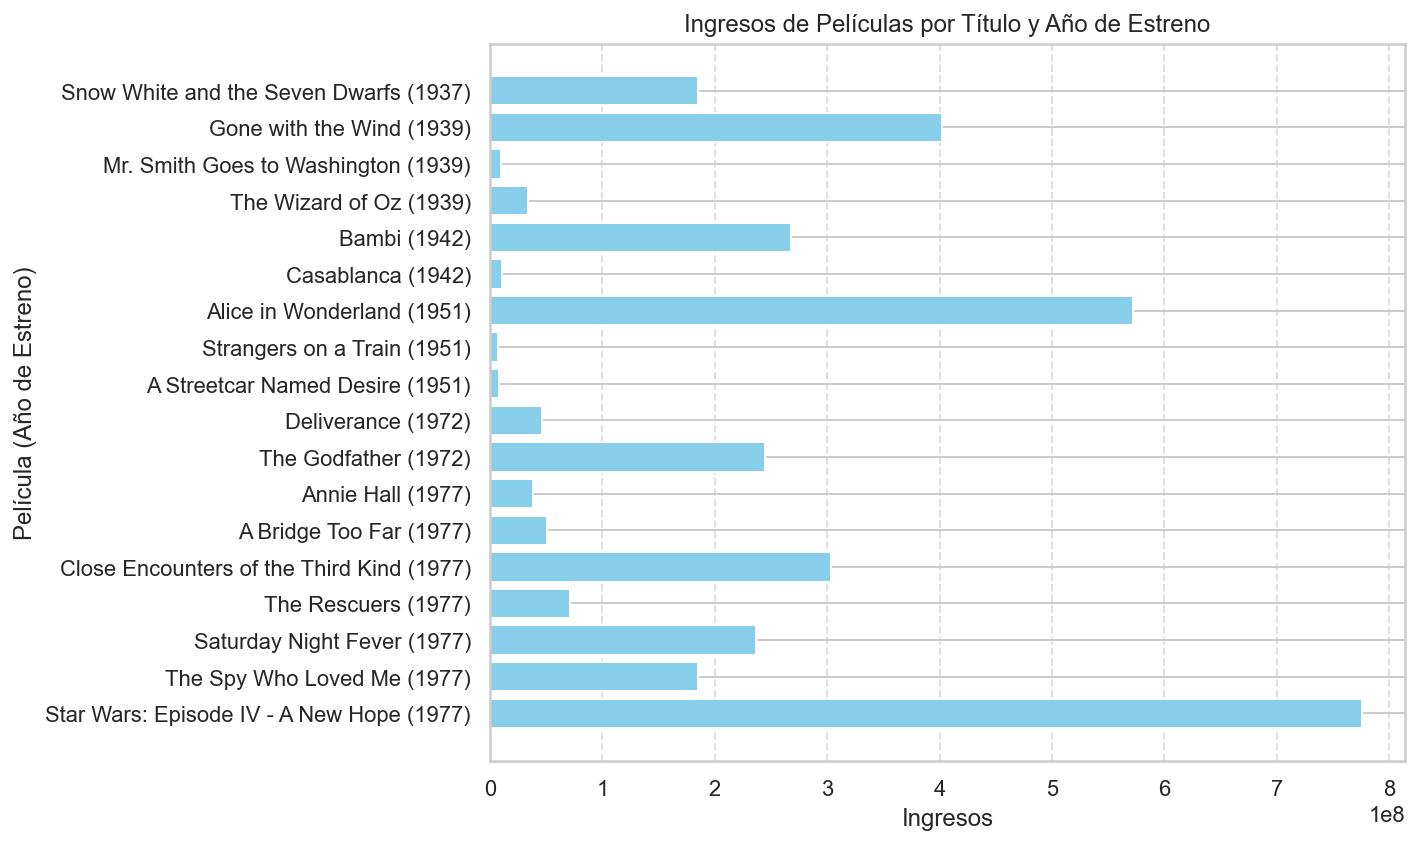

In [23]:
etiquetas_y = [f'{titulo} ({año})' for titulo, año in zip(df_anomalies['title'], df_anomalies['year'])]

plt.figure(figsize=(10, 6))
plt.barh(etiquetas_y, df_anomalies['revenue'], color='skyblue')

# Etiquetar los ejes y título
plt.xlabel('Ingresos')
plt.ylabel('Película (Año de Estreno)')
plt.title('Ingresos de Películas por Título y Año de Estreno')

# Mostrar el gráfico
plt.gca().invert_yaxis()  # Invierte el eje y para que las películas con mayores ingresos estén arriba
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Puede apreciarse que estas anomalías se deben a películas concretas como "_Gone with the wind_" ("Lo que el viento se llevó"), "_Alice in Wonderland_" ("Alicia en el país de las maravillas") y, sobre todo, "_Star Wars_". También hay otras como "_Close Encounters with the Third Kind"_ ("Encuentros en la tercera fase"), o algunas otras de animación como "Bambi" y "_Snow White and the Seven Dwarfs_" ("Blancanieves y los siete enanitos").

<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---


### <font color="#7F000E">Conclusión </font>
<br>

Como resumen hasta ahora puede establecerse que, efectivamente, el presupuesto está muy relacionado con los ingresos, y éstos, relativamente, con el número de votos. Con respecto a la valoración, sin embargo, no parece que haya una relación relevante, lo que constituye el hallazgo que, a priori, podría resultar contrario a nuestra intuición. 

Además, hay una variable _latente_ que condiciona los ingresos: la fecha de estreno. Para estudiar la repercusión de otros factores se hace necesario tener en cuenta esta circunstancia. Existen varias posibilidades. 

* Aplicar un factor de corrección a los ingresos en función del año.
* Estudiar distintos periodos de tiempo por separado. 
* Hacer el estudio para franjas de prespuesto específicas. 
* Calcular el porcentaje o ratio de ingresos con respecto al presupuesto. 

Debido esto, y al objetivo del estudio (producción de una película de presupuesto relativamente bajo), se considerarán películas más actuales. Además, desde el año 2000 en adelante se observa que el crecimiento del presupuesto es mucho más lento, por lo que se pueden utilizar las películas estrenadas a partir de esa fecha.

In [24]:
df_movies = df_movies[df_movies['release_date']>='2000']
df_movies.head()

,title,genres,avg_rating,num_votes,budget,revenue,release_date,original_language,popularity,keywords,year
movie_id,,,,,,,,,,,
tt0035423,Kate & Leopold,"Comedy,Fantasy,Romance",6.4,78387,48000000,76019048,2001-12-25,en,11.034,"lover (female),love of one's life,time travel,...",2001
tt0118694,In the Mood for Love,"Drama,Romance",8.1,121618,150000,12854953,2000-05-22,cn,16.623,"adultery,lovesickness,martial arts,newspaper,h...",2000
tt0120630,Chicken Run,"Adventure,Animation,Comedy",7.0,175530,45000000,224834564,2000-06-21,en,26.982,"raf (royal air force),chicken,northern england...",2000
tt0120667,Fantastic Four,"Action,Adventure,Fantasy",5.7,309685,100000000,333535934,2005-06-29,en,27.816,"flying,sibling relationship,fire,marriage prop...",2005
tt0120679,Frida,"Biography,Drama,Romance",7.4,80566,12000000,56298474,2002-08-29,en,13.136,"painter,love of one's life,bisexuality,biograp...",2002


<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---



## <font color="#7F000E"> 3. Géneros  </font>
<br>

<a id="section3"></a>
En la base de datos original, `df_movies`, los géneros de cada película aparecen separados por comas en la columna `genres`. Para poder estudiar la repercusión de este factor, es necesario llevar a cabo una **transformación** que permita operar de manera ágil. Dado que el número de géneros es limitado y reducido, es posible utilizar variables identificadoras (_dummy_).  _Otra posibilidad_ consiste en crear un conjunto de datos auxiliar, `df_genres`, en formato _tidy_ o _long form_, en el que cada fila corresponda a un par película-género, y hacer las uniones correspondientes con`df_movies`.  Se seguirá esta última alternativa, ya que permite trabajar directamente con *seaborn* sin necesidad de preparar los datos para cada gráfica. 



#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 15</font> 

 Crear un _DataFrame_ denominado `df_genres` en el que cada fila corresponda a una película (indexado por `movie_id`) y cada columna corresponda a uno de los géneros. El valor para una película/genero será verdadero o falso en función de si la película corresponde a ese género o no. 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> Este ejercicio se puede hacer fácilmente mediante la función `Series.str.get_dummies()`, ya que opera sobre Strings y admite un separador.
</div>

In [25]:
# Dividir la columna 'genres' por comas y crear una lista de géneros para cada película
df_movies['genres'] = df_movies['genres'].astype(str)
df_movies['genres'] = df_movies['genres'].str.split(',')
df_movies.head()

,title,genres,avg_rating,num_votes,budget,revenue,release_date,original_language,popularity,keywords,year
movie_id,,,,,,,,,,,
tt0035423,Kate & Leopold,"[Comedy, Fantasy, Romance]",6.4,78387,48000000,76019048,2001-12-25,en,11.034,"lover (female),love of one's life,time travel,...",2001
tt0118694,In the Mood for Love,"[Drama, Romance]",8.1,121618,150000,12854953,2000-05-22,cn,16.623,"adultery,lovesickness,martial arts,newspaper,h...",2000
tt0120630,Chicken Run,"[Adventure, Animation, Comedy]",7.0,175530,45000000,224834564,2000-06-21,en,26.982,"raf (royal air force),chicken,northern england...",2000
tt0120667,Fantastic Four,"[Action, Adventure, Fantasy]",5.7,309685,100000000,333535934,2005-06-29,en,27.816,"flying,sibling relationship,fire,marriage prop...",2005
tt0120679,Frida,"[Biography, Drama, Romance]",7.4,80566,12000000,56298474,2002-08-29,en,13.136,"painter,love of one's life,bisexuality,biograp...",2002


In [26]:
df_genres = df_movies['genres'].explode().reset_index()
df_genres = pd.get_dummies(df_genres, columns=['genres'], prefix='', prefix_sep='').groupby('movie_id').max()
df_genres = df_genres.astype(bool)

print(df_genres)

           Action  Adventure  Animation  Biography  Comedy  Crime  \
movie_id                                                            
tt0035423   False      False      False      False    True  False   
tt0118694   False      False      False      False   False  False   
tt0120630   False       True       True      False    True  False   
tt0120667    True       True      False      False   False  False   
tt0120679   False      False      False       True   False  False   
...           ...        ...        ...        ...     ...    ...   
tt8364368    True      False      False      False   False  False   
tt8367814    True      False      False      False    True   True   
tt8579674   False      False      False      False   False  False   
tt8772262   False      False      False      False   False  False   
tt8946378   False      False      False      False    True   True   

           Documentary  Drama  Family  Fantasy  ...  Music  Musical  Mystery  \
movie_id              

Almacena los nombres de los  géneros en una lista.

In [27]:
genres = df_genres.columns.to_list()


#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 16</font> 

Apilar los datos del _DataFrame_ anterior, de modo que el índice del _DataFrame_ resultante, `movie_id`, corresponda al título;  una nueva columna, `genre`, corresponda al género (por nombre); y una segunda, `ind`, al valor del género para ese título (`True/False`) (para cada título, habría tantas filas como géneros).

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> Este ejercicio se puede hacer de varias maneras. Si se hace con `DatFrame.stack()` el resultado es una serie con índice jerárquico que hay que deshacer con  `DataFrame.reset_index()`; posteriormente, hay que renombrar las columnas y reestablecer el índice. También se puede hacer con `DataFrame.melt()`. En ese caso, se ha de resetear el índice anteriormente, y luego se ha de restaurar en el resultado. 

In [28]:
df_genres.reset_index(inplace=True)

# Crear un nuevo DataFrame apilando los datos
df_stacked = pd.melt(df_genres, id_vars=['movie_id'], var_name='genre', value_name='ind')

# Establecer índice
df_stacked.set_index('movie_id', inplace=True)

# Mostrar el DataFrame resultante
print(df_stacked)

             genre    ind
movie_id                 
tt0035423   Action  False
tt0118694   Action  False
tt0120630   Action  False
tt0120667   Action   True
tt0120679   Action  False
...            ...    ...
tt8364368  Western  False
tt8367814  Western  False
tt8579674  Western  False
tt8772262  Western  False
tt8946378  Western  False

[46794 rows x 2 columns]



#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 17</font> 

 Seleccionar las filas de `df_genres` en las que `ind` sea `True`. Posteriormente, eliminar la columna `ind`.

In [29]:
# Elimina las entradas en las que el indicador es 0, y posteriormente la columna con el indicador. 

df_genres = df_stacked[df_stacked['ind'] == True]

df_genres = df_genres.drop(columns=['ind'])

# Muestra las entradas correspondientes a la película "Avatar" (Adventure, Action, Fantasy)
print(df_genres.loc['tt0499549'])
#                genre
# movie_id            
# tt0499549     Action
# tt0499549  Adventure
# tt0499549    Fantasy

               genre
movie_id            
tt0499549     Action
tt0499549  Adventure
tt0499549    Fantasy


#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 18</font> 

 A partir del *DataFrame* `df_genres`, es posible visualizar con qué frecuencia aparecen los géneros.  Dibujar un gráfico de barras (horizontal) que muestre el número de entradas correspondientes a cada valor de `genre` en el *DataFrame* `df_genres`.

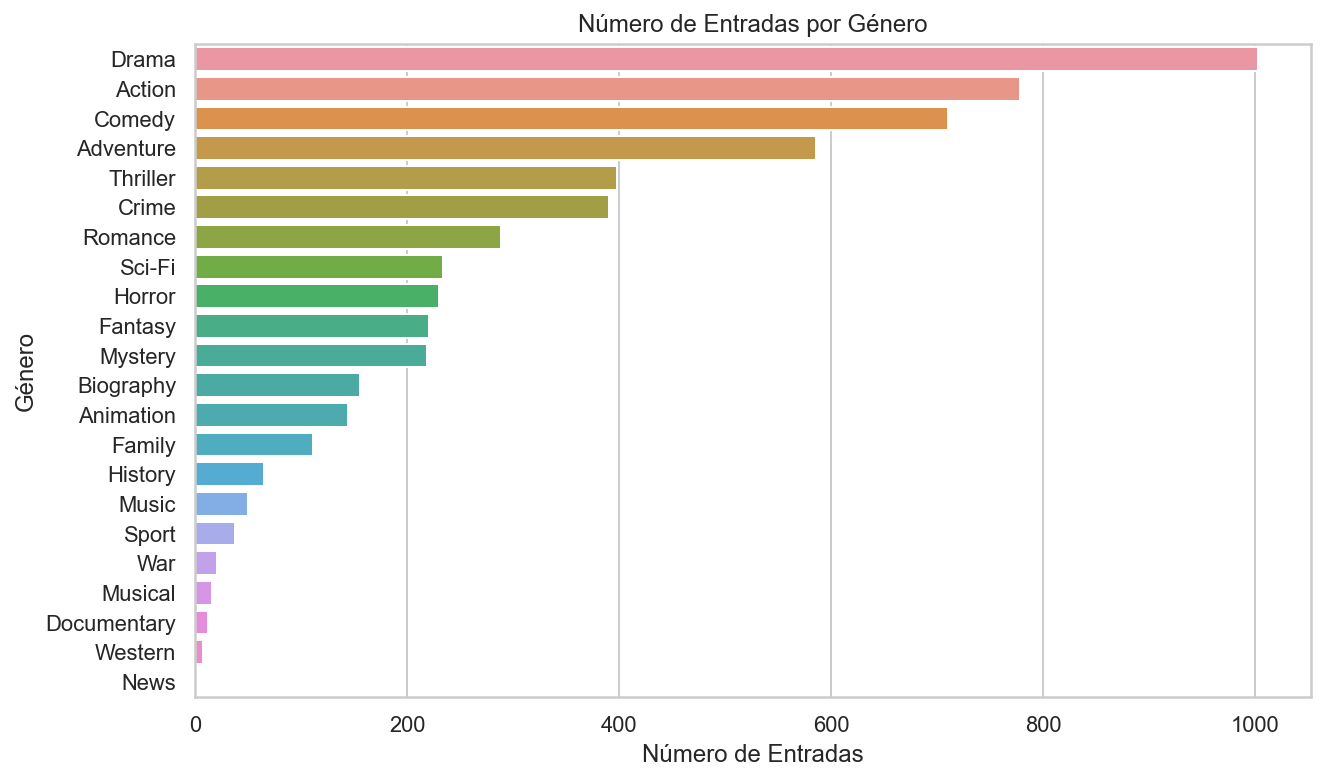

In [30]:
sns.set(style="whitegrid")

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.countplot(y='genre', data=df_genres, order=df_genres['genre'].value_counts().index)

plt.xlabel('Número de Entradas')
plt.ylabel('Género')
plt.title('Número de Entradas por Género')

plt.show()

Parece que el drama es, de largo, el género que tratan más películas. Le siguien la comedia y la acción.

<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---

<a id="section31"></a>
### <font color="#7F000E">3.1 Información por género </font>
<br>

Analizar la información por género implica fundir el *DataFrame* `df_genres` con la columna correspondiente de `df_movies`, pero preservando todas las entradas de `df_genres`(es necesario fundir por índice con `on='movie_id'`, y especificar el *DataFrame* correspondiente mediante `how`).

#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 19</font> 

 Mostrar la popularidad por género con un gráfico de cajas. 

In [31]:
df_merged = df_genres.merge(df_movies, on='movie_id', how='left')

df_merged.head()

,genre,title,genres,avg_rating,num_votes,budget,revenue,release_date,original_language,popularity,keywords,year
movie_id,,,,,,,,,,,,
tt0120667,Action,Fantastic Four,"[Action, Adventure, Fantasy]",5.7,309685,100000000,333535934,2005-06-29,en,27.816,"flying,sibling relationship,fire,marriage prop...",2005
tt0120737,Action,The Lord of the Rings: The Fellowship of the Ring,"[Action, Adventure, Drama]",8.8,1637767,93000000,871368364,2001-12-18,en,50.073,"elves,dwarf,orcs,hobbit,loss of loved one,base...",2001
tt0120755,Action,Mission: Impossible II,"[Action, Adventure, Thriller]",6.1,311635,125000000,546388105,2000-05-24,en,28.519,"spain,cia,helicopter,secret identity,skyscrape...",2000
tt0120804,Action,Resident Evil,"[Action, Horror, Sci-Fi]",6.7,245597,33000000,102984862,2002-03-15,en,21.668,"amnesia,undercover,mutant,biological weapon,ho...",2002
tt0120903,Action,X-Men,"[Action, Adventure, Sci-Fi]",7.4,566240,75000000,296339527,2000-07-13,en,1.761,"mutant,superhero,based on comic,superhuman,x-men",2000


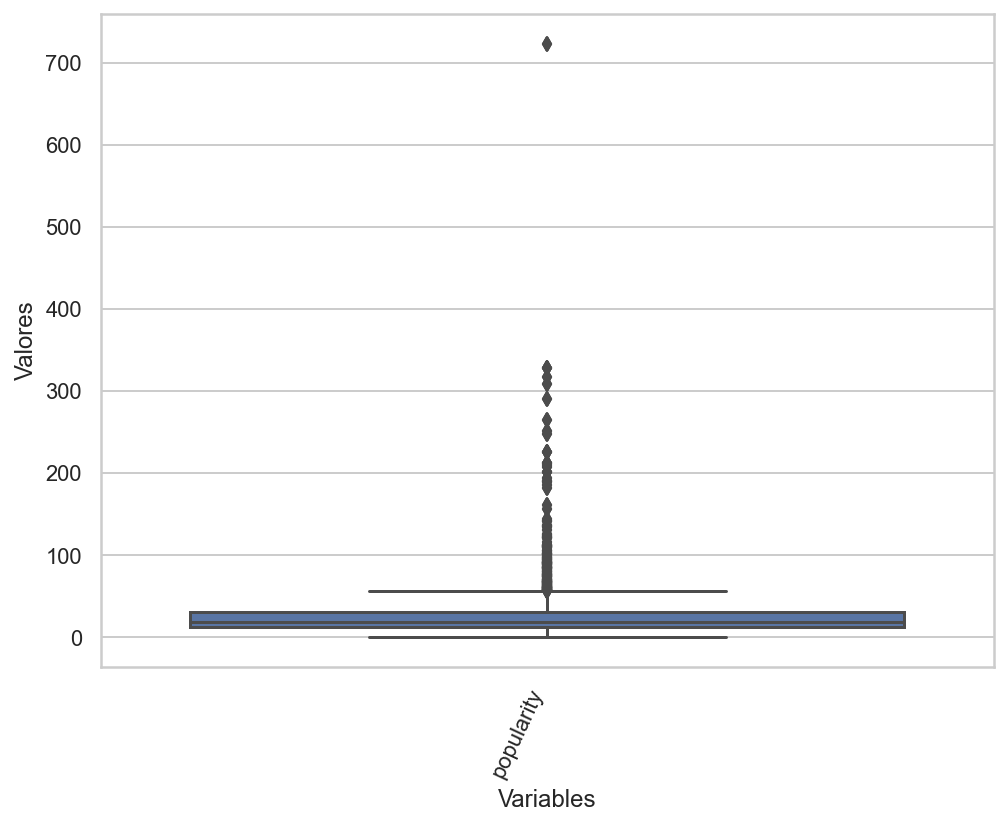

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Utilizar sns.boxplot para crear el gráfico de cajas
sns.boxplot(data=df_merged[['genre','popularity']], orient="vertical")

plt.xlabel('Variables')
plt.ylabel('Valores')

plt.xticks(rotation = 65, ha='right')

plt.show()

Proceder de este modo (utilizando `pd.merge()` para hacer cada gráfica) evita tener que almacenar datos redundantes, y sería lo adecuado al trabajar con bases de datos grandes (aunque las operaciones serían más lentas). En este caso, puesto que la base de datos es reducida, y se tendrá que repetir la operación más veces, parece más cómodo (simplificará el código) fundir `df_genres` y `df_movies` y almacenar el resultado para usos sucesivos. 



#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 20</font> 

 Crear un nuevo conjunto de datos, denominado `df_movies_genre` resultado de unir `df_genres` con `df_movies`. Este nuevo conjunto ha de contener una fila por cada fila de `df_genres` (si se utiliza `merge`, `df_genres` aparece a la izquierda). Incluir solamente las columnas `title`, `'avg_rating'`, `'num_votes'`, `'budget'`, `'revenue'`, `'popularity'` y `'release_year'`.

In [33]:
#Se trabaja con el conjunto de datos de df_movies

df_movies_genre = df_movies.copy()
df_movies_genre['release_year'] = df_movies_genre['release_date'].dt.year
df_movies_genre.drop(columns=['release_date'], inplace=True)
df_movies_genre = df_movies_genre[['title', 'avg_rating', 'num_votes', 'budget', 'revenue', 'popularity', 'release_year']]

#Se mergea con el conjunto de datos de df_genre

df_movies_genre = df_genres.merge(df_movies_genre, on='movie_id', how='left')

#Se muestra el resultado para un movie_id particular

df_movies_genre.loc['tt0499549']

,genre,title,avg_rating,num_votes,budget,revenue,popularity,release_year
movie_id,,,,,,,,
tt0499549,Action,Avatar,7.8,1109575,237000000,2787965087,90.17,2009
tt0499549,Adventure,Avatar,7.8,1109575,237000000,2787965087,90.17,2009
tt0499549,Fantasy,Avatar,7.8,1109575,237000000,2787965087,90.17,2009




Para explorar la relación entre presupuestos e ingresos en función del género, debido a que las distribuciones están sesgadas, se utilizarán
gráficas del tipo `sns.boxplot()`. Como paso previo, y para facilitar la exploración, se pueden ordenar los géneros en función de la ___mediana___ de los ingresos obtenidos por las películas correspondientes. Este orden se almacena an la lista `ordered_genres`.

In [34]:
ordered_genres = df_movies_genre.groupby('genre')['revenue'].median().sort_values(ascending=False).index.tolist()
print(ordered_genres)

['Animation', 'Adventure', 'Family', 'Sci-Fi', 'Musical', 'Action', 'Fantasy', 'Comedy', 'Music', 'Western', 'Thriller', 'Romance', 'War', 'Mystery', 'Horror', 'History', 'Sport', 'Biography', 'Crime', 'Drama', 'Documentary', 'News']


#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 21</font> 

 Dibujar un gráfico de cajas y bigotes con el beneficio por género, utilizando el orden entre géneros almacenado en `ordered_genres`.


<div class="alert alert-block alert-info">

<i class="fa fa-info-circle" aria-hidden="true"></i> Para pasar el orden de las cajas puede utilizarse el parámetro `order`. Por otra parte, pueden cambiarse los colores de la gráfica, por ejemplo, con `palette="flare"`, que es una paleta secuencial. También se deben rotar las etiquetas del eje *x* con `plt.xticks()`.
</div>

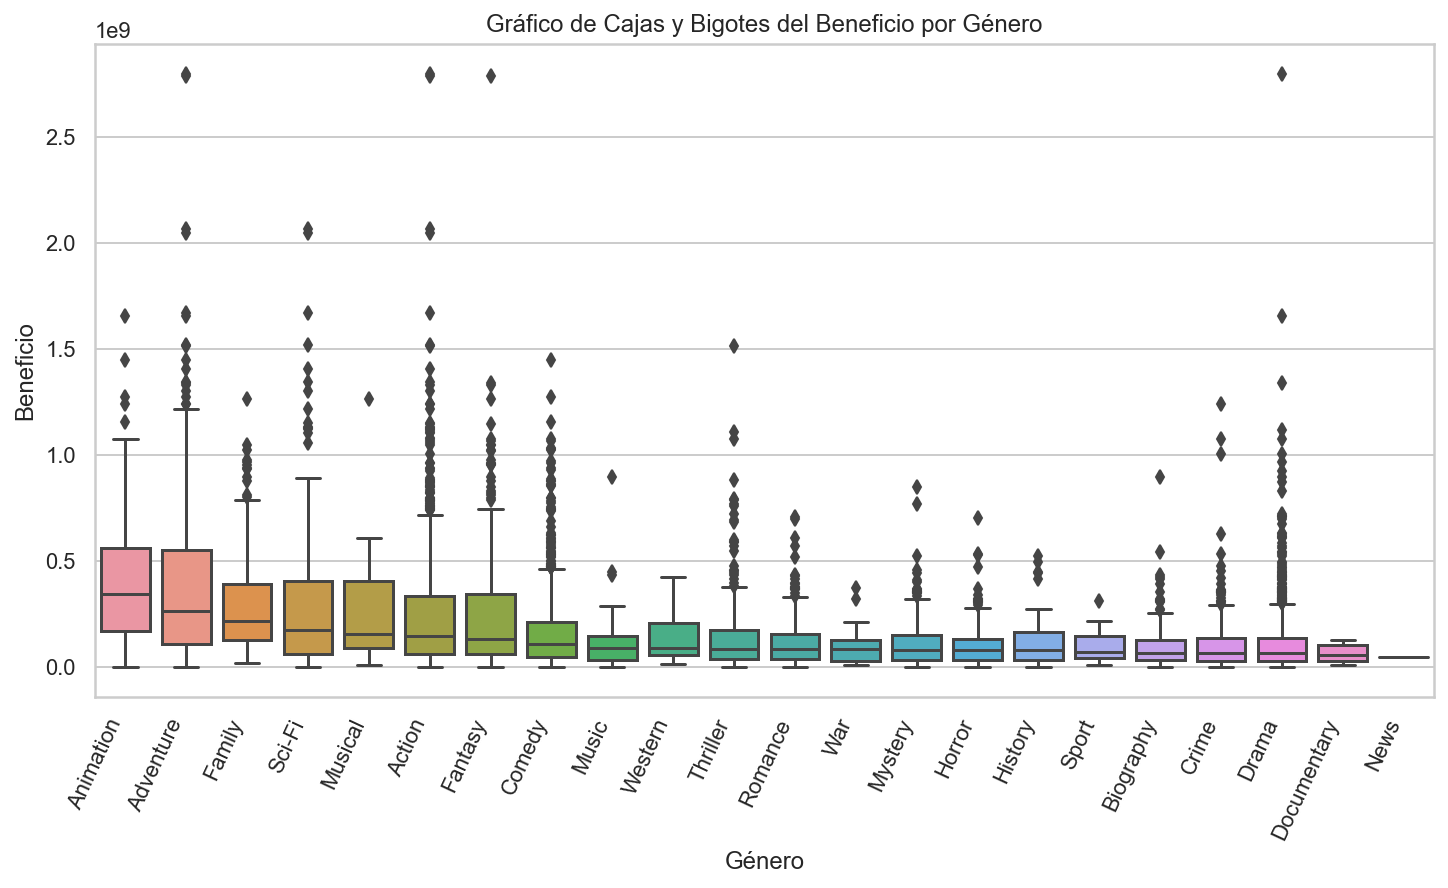

In [35]:
# Reordenar los datos según ordered_genres
df_movies_genre = df_movies_genre[df_movies_genre['genre'].isin(ordered_genres)]

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Utilizar sns.boxplot para crear el gráfico de cajas y bigotes
sns.boxplot(x='genre', y='revenue', data=df_movies_genre, order=ordered_genres)

# Añadir etiquetas y título
plt.xlabel('Género')
plt.ylabel('Beneficio')
plt.title('Gráfico de Cajas y Bigotes del Beneficio por Género')

# Rotar las etiquetas en el eje x para una mejor legibilidad
plt.xticks(rotation=65, ha='right')
plt.show()

Puede apreciarse que las películas de animación, aventuras, y familia, son las que más recaudan. Las que menos, los dramas, los documentales, y las noticias. Es curioso, aunque puede estar relacionado, que el drama es el género más frecuente.
<br>




#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 22</font> 

 Anteriormente se comprobó la importancia del presupuesto en la recaudación. Por tanto, es interesante también estudiar si la relación de las recaudaciones por género se refleja también en los presupuestos.   Elaborar una gráfica similar a la anterior en la que se muestre el presupuesto por géneros. Para comparar, puede ser de utilidad mantener el mismo orden en la representación utilizado anteriormente (la mediana de los ingresos).



In [36]:
ordered_genres_budget = df_movies_genre.groupby('genre')['budget'].median().sort_values(ascending=False).index.tolist()
print(ordered_genres_budget)

['Adventure', 'Animation', 'Family', 'Sci-Fi', 'Fantasy', 'Action', 'Western', 'Musical', 'History', 'Comedy', 'Crime', 'Romance', 'Sport', 'Thriller', 'Biography', 'Drama', 'Music', 'Mystery', 'War', 'Horror', 'Documentary', 'News']


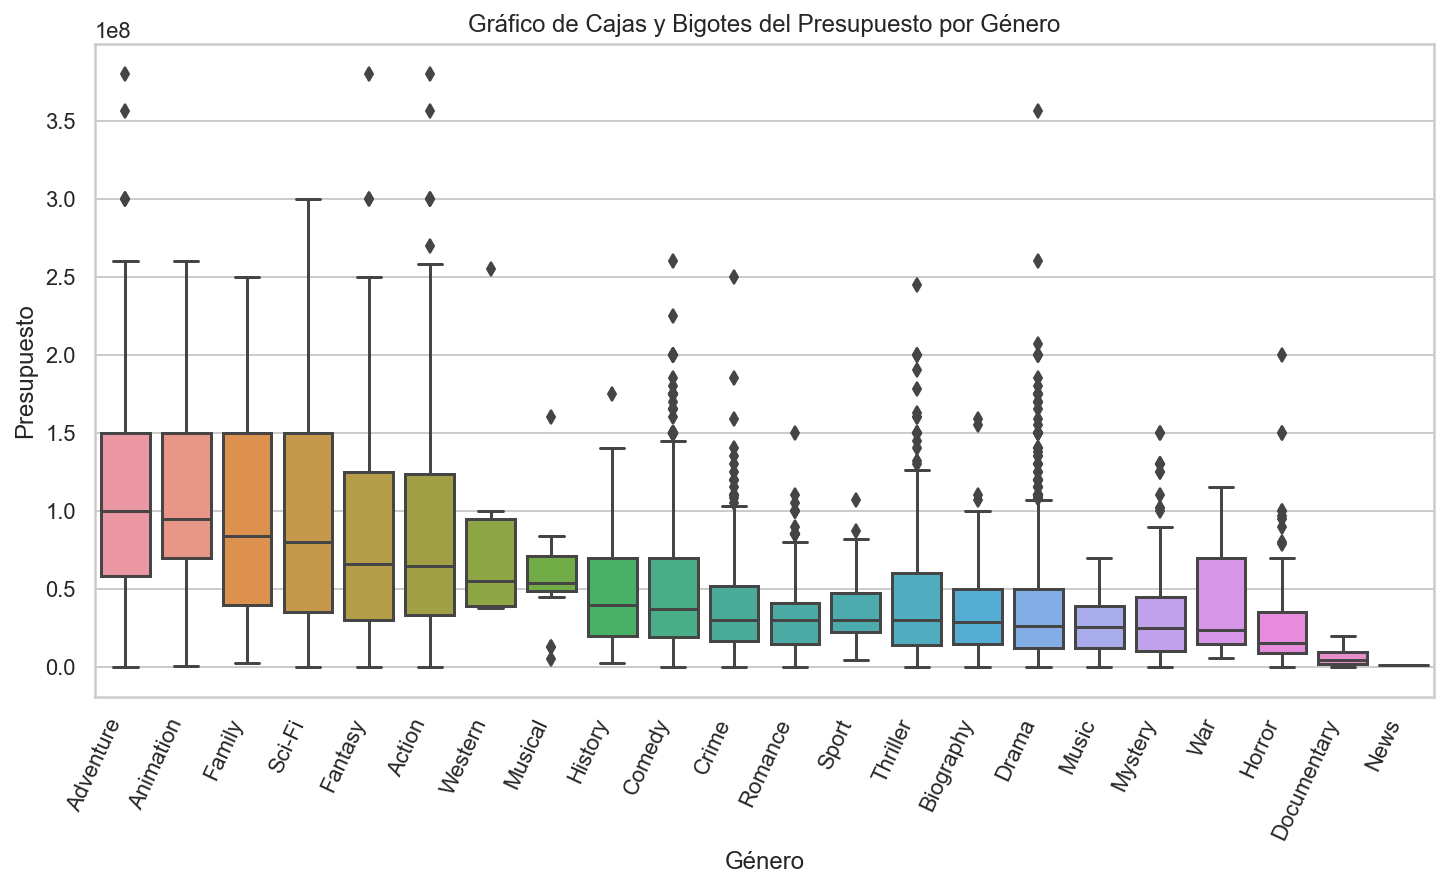

In [37]:
# Reordenar los datos según ordered_genres_budget
df_movies_genre = df_movies_genre[df_movies_genre['genre'].isin(ordered_genres_budget)]

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Utilizar sns.boxplot para crear el gráfico de cajas y bigotes
sns.boxplot(x='genre', y='budget', data=df_movies_genre, order=ordered_genres_budget)

# Añadir etiquetas y título
plt.xlabel('Género')
plt.ylabel('Presupuesto')
plt.title('Gráfico de Cajas y Bigotes del Presupuesto por Género')

# Rotar las etiquetas en el eje x para una mejor legibilidad
plt.xticks(rotation=65, ha='right')
plt.show()

Se aprecian algunos cambios menores.  No obstante, la tendencia general, es que los géneros que producen más ingresos son también los que más presupuesto reciben. Aún así, el uso de la paleta `flare` puede distorsionar la percepción de la grafica ya que hace percibir más orden del que realmente hay. Utilizar un color solamente. Por ejemplo, un tono de gris claro con `color='.95'`.



<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---

<a id="section32"></a>
### <font color="#7F000E">3.2 Películas con bajo presupuesto </font>
<br>

En el objetivo de estudio que se ha establecido inicialmente, se parte de la base de que se dispone de un presupuesto limitado, por lo que se va a estudiar también la relación entre género e ingresos en este supuesto, considerando solamente aquellas películas cuyo presupuesto se encuentra en el 25% más bajo.

In [38]:
low_budget = df_movies_genre['budget'].quantile(0.25)
low_budget

19000000.0

#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 23</font> 

 Almacenar en un *DataFrame* denominado `df_movies_genre_low` las películas con presupuesto por debajo (estrictamente) del umbral que de presupuesto.

In [39]:
df_movies_genre_low = df_movies_genre[df_movies_genre['budget'] < low_budget]

len(df_movies_genre_low)

1387

#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 24</font> 

 Recalcular el orden de los géneros en función de la mediana los ingresos y construir una gráfica de cajas con los datos almacenados en el *DataFrame* `df_movies_genre_low` (se trata de repetir los ejercicios anteriores, pero con estos datos).

In [40]:
ordered_genres_low = df_movies_genre_low.groupby('genre')['revenue'].median().sort_values(ascending=False).index.tolist()
print(ordered_genres_low)

['Horror', 'Mystery', 'Documentary', 'News', 'Family', 'Music', 'History', 'Musical', 'Biography', 'Thriller', 'Romance', 'Comedy', 'Sport', 'War', 'Drama', 'Adventure', 'Fantasy', 'Sci-Fi', 'Action', 'Crime', 'Animation']


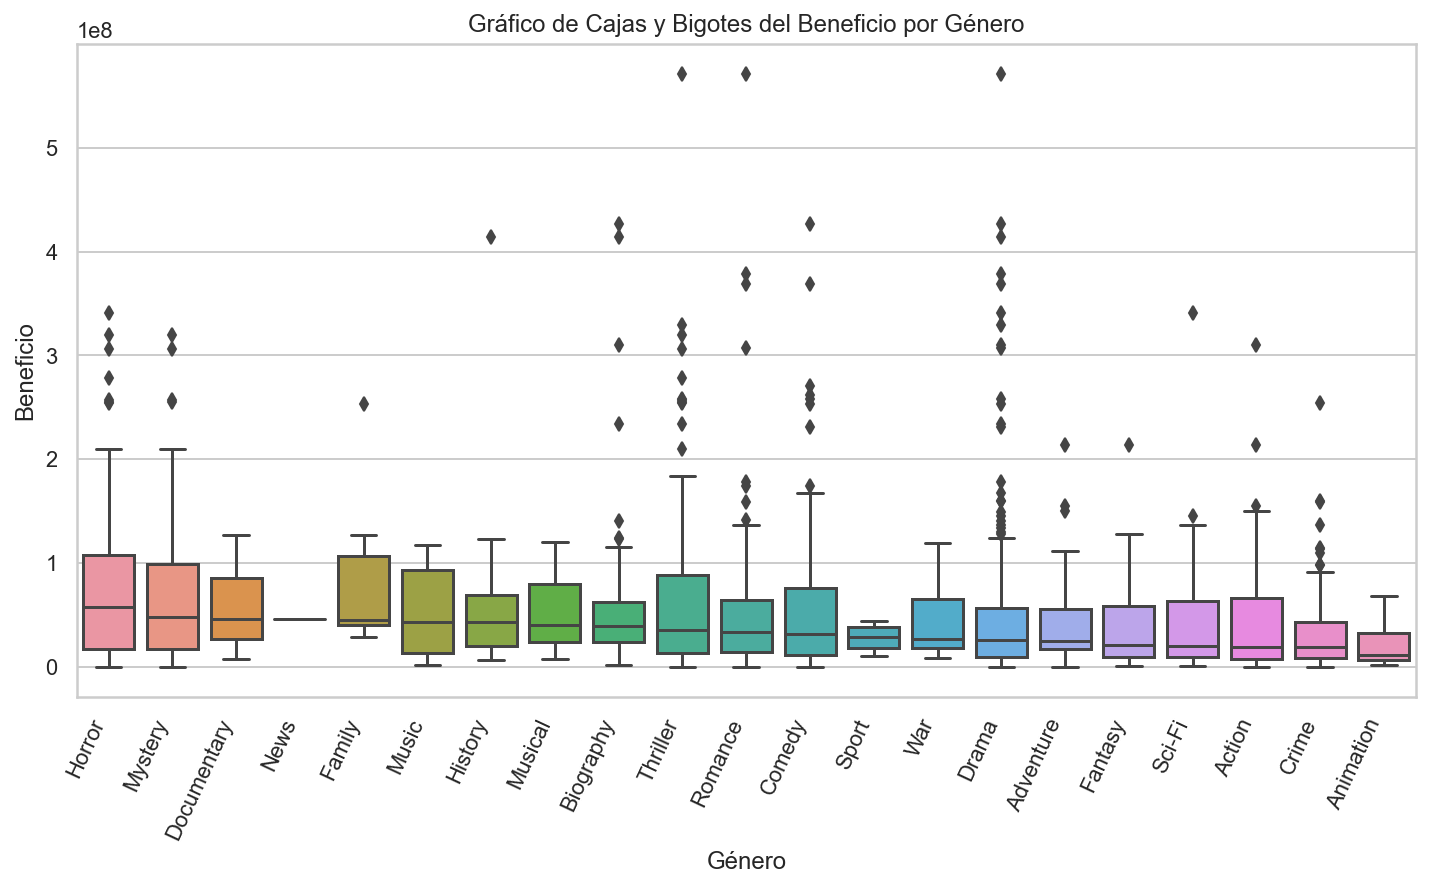

In [41]:
# Reordenar los datos según ordered_genres_low
df_movies_genre_low = df_movies_genre_low[df_movies_genre_low['genre'].isin(ordered_genres_low)]

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Utilizar sns.boxplot para crear el gráfico de cajas y bigotes
sns.boxplot(x='genre', y='revenue', data=df_movies_genre_low, order=ordered_genres_low)

# Añadir etiquetas y título
plt.xlabel('Género')
plt.ylabel('Beneficio')
plt.title('Gráfico de Cajas y Bigotes del Beneficio por Género')

# Rotar las etiquetas en el eje x para una mejor legibilidad
plt.xticks(rotation=65, ha='right')
plt.show()

Puede apreciarse un cambio claro de tendencia. Aunque los beneficios se han conseguido con otros géneros, cuando los prespuestos son relativamente bajos, géneros como el misterio y el terror pasan a ser más rentables.  También algún otro género como las noticias o deportes. Llama también la atención que, géneros como la animación o musical, que son los más rentables en general, no son rentables cuando los presupuestos bajos.
<br>

Los géneros más rentables son el terror, y el misterio. Se seleccionarán las películas correspondientes a estos géneros, además del _thriller_ (esta última por estar relacionada) para estudiarlas en más profundidad. 

#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 25</font> 

 Eliminar de `df_movies_genre_low` las películas que no correspondan a los géneros `Horror`, `Thriller` o `Mystery` (en realidad es seleccionarlas y guardar el resultado en `df_movies_genre_low`).

In [42]:
generos_permitidos = ['Horror', 'Thriller', 'Mystery']

# Filtrar las películas que pertenecen a los géneros permitidos
df_movies_genre_low = df_movies_genre_low[df_movies_genre_low['genre'].isin(generos_permitidos)]

df_movies_genre_low.head()

,genre,title,avg_rating,num_votes,budget,revenue,popularity,release_year
movie_id,,,,,,,,
tt0211443,Horror,Jason X,4.4,50261,11000000,16951798,31.873,2001
tt0219699,Horror,The Gift,6.6,62933,10000000,12008642,14.063,2000
tt0230600,Horror,The Others,7.6,334157,17000000,209947037,18.656,2001
tt0251736,Horror,House of 1000 Corpses,6.1,77487,7000000,17949758,20.753,2003
tt0256009,Horror,The Devil's Backbone,7.4,61317,4500000,6582065,12.027,2001


#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 26</font> 

  Eliminar también la columna `genre` (ya no nos hace falta) y eliminar los duplicados

In [43]:
# Eliminar la columna "genre"
df_movies_genre_low.drop(columns=['genre'], inplace=True)

# Eliminar los duplicados
df_movies_genre_low.drop_duplicates(inplace=True)

df_movies_genre_low.head()

,title,avg_rating,num_votes,budget,revenue,popularity,release_year
movie_id,,,,,,,
tt0211443,Jason X,4.4,50261,11000000,16951798,31.873,2001
tt0219699,The Gift,6.6,62933,10000000,12008642,14.063,2000
tt0230600,The Others,7.6,334157,17000000,209947037,18.656,2001
tt0251736,House of 1000 Corpses,6.1,77487,7000000,17949758,20.753,2003
tt0256009,The Devil's Backbone,7.4,61317,4500000,6582065,12.027,2001


#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 27</font> 

Mostrar el número de títulos que se ajustan al objeto de la exploración (_Horror_, _Thriller_, o _Mistery_) y presupuesto menor que 19000000 dólares).

In [44]:
len(df_movies_genre_low)

224

<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---


<a id="section4"></a>
## <font color="#7F000E"> 4. Personas  </font>
<br>

Una vez escogidos los géneros "objetivo", va a estudiarse si el director y el reparto tienen relación con la rentabilidad de las películas. El _DataFrame_ `df_credits` contiene la relación de personas que participan en cada película y en calidad de qué. Por otra parte, el _DataFrame_ `df_people` contiene la información relativa a cada persona. 

#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 28</font> 

  Crear un _DataFrame_ denominado `df_credits_tidy` en el que, para cada entrada de `df_credits`, se incluya también la información personal. El resultado ha de tener tantas filas como `df_credits`. Eliminar las filas con datos perdidos. 

In [45]:
len(df_credits)

13681

In [46]:
df_credits_tidy = df_credits.merge(df_people, on='people_id', how='left')
df_credits_tidy.set_index(df_credits.index, inplace=True)
len(df_credits_tidy)

13681

In [47]:
df_credits_tidy.head()

,people_id,rol,name,popularity,imdb_id,gender
movie_id,,,,,,
tt0010323,2991,director,Robert Wiene,0.600,nm0927468,2
tt0012349,13848,director,Charlie Chaplin,3.607,nm0000122,2
tt0013442,9076,director,F.W. Murnau,2.029,nm0003638,2
tt0015648,9603,director,Sergei Eisenstein,1.620,nm0001178,2
tt0015864,13848,director,Charlie Chaplin,3.607,nm0000122,2


In [48]:
# Eliminar las filas con datos perdidos y duplicados
df_credits_tidy = df_credits_tidy.dropna()
len(df_credits_tidy)

13636

In [49]:
df_credits_tidy.head()

,people_id,rol,name,popularity,imdb_id,gender
movie_id,,,,,,
tt0010323,2991,director,Robert Wiene,0.600,nm0927468,2
tt0012349,13848,director,Charlie Chaplin,3.607,nm0000122,2
tt0013442,9076,director,F.W. Murnau,2.029,nm0003638,2
tt0015648,9603,director,Sergei Eisenstein,1.620,nm0001178,2
tt0015864,13848,director,Charlie Chaplin,3.607,nm0000122,2


Siguiendo con la filosofía anterior, y *con el fin de facilitar la exploración*, se creará un conjunto de datos denominado `df_movie_people_low` con las películas objeto de estudio, y las personas que han trabajado en ellas. 

#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 29</font> 

  Crear el _DataFrame_ `df_movie_people_low` en el que  cada entrada de `df_credits_tidy` se extienda también con información de la película (del _DataFrame_ `df_movies_genre_low`). Renombrar las columnas `popularity` a `popularity_mov` y `popularity_per`. El `DataFrame` resultante solamente debe contener información relativa a las películas de interés. 

In [50]:
#Renombrando la columna popularity en df_movies_genre_low
df_movies_genre_low.rename(columns={'popularity': 'popularity_mov'}, inplace=True)
df_movies_genre_low.head()

,title,avg_rating,num_votes,budget,revenue,popularity_mov,release_year
movie_id,,,,,,,
tt0211443,Jason X,4.4,50261,11000000,16951798,31.873,2001
tt0219699,The Gift,6.6,62933,10000000,12008642,14.063,2000
tt0230600,The Others,7.6,334157,17000000,209947037,18.656,2001
tt0251736,House of 1000 Corpses,6.1,77487,7000000,17949758,20.753,2003
tt0256009,The Devil's Backbone,7.4,61317,4500000,6582065,12.027,2001


In [51]:
#Renombrando la columna popularity en df_credits_tidy
df_credits_tidy.rename(columns={'popularity': 'popularity_per'}, inplace=True)
df_credits_tidy.head()

,people_id,rol,name,popularity_per,imdb_id,gender
movie_id,,,,,,
tt0010323,2991,director,Robert Wiene,0.600,nm0927468,2
tt0012349,13848,director,Charlie Chaplin,3.607,nm0000122,2
tt0013442,9076,director,F.W. Murnau,2.029,nm0003638,2
tt0015648,9603,director,Sergei Eisenstein,1.620,nm0001178,2
tt0015864,13848,director,Charlie Chaplin,3.607,nm0000122,2


In [52]:
#Mergeando df_credits_tidy con df_movies_genre_low solamente para las películas que contienen valores en ambas tablas (parametro 'inner')
df_movie_people_low = df_credits_tidy.merge(df_movies_genre_low, on='movie_id', how='inner')

df_movie_people_low.head(5)

,people_id,rol,name,popularity_per,imdb_id,gender,title,avg_rating,num_votes,budget,revenue,popularity_mov,release_year
movie_id,,,,,,,,,,,,,
tt0166924,5602,director,David Lynch,3.721,nm0000186,2,Mulholland Dr.,8.0,317360,15000000,20117339,16.706,2001
tt0166924,15009,cast,Justin Theroux,4.417,nm0857620,2,Mulholland Dr.,8.0,317360,15000000,20117339,16.706,2001
tt0166924,3489,cast,Naomi Watts,19.082,nm0915208,1,Mulholland Dr.,8.0,317360,15000000,20117339,16.706,2001
tt0166924,15007,cast,Laura Harring,8.413,nm0005009,1,Mulholland Dr.,8.0,317360,15000000,20117339,16.706,2001
tt0183649,5572,director,Joel Schumacher,1.605,nm0001708,2,Phone Booth,7.0,249335,13000000,97837138,13.689,2002


<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---

<a id="section41"></a>
### <font color="#7F000E">4.1 Directores </font>
<br>

En primer lugar, se va a determinar qué directores han generado una mayor cantidad de ingresos. Cabe recordar el conjunto actual contiene películas estrenadas del 2000 en adelante, y que pertenecen a los géneros horror, _thriller_, y misterio.

#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 30</font> 

 Visualizar la distribución de los valores relativos a la recaudación para los directores a partir del *DataFrame* `df_movie_people_low`.

In [53]:
# Filtrar el DataFrame para obtener solo las filas donde 'rol' es igual a 'director'
directores_df = df_movie_people_low[df_movie_people_low['rol'] == 'director']

#Eliminar indices duplicados (peliculas cuplicadas) del dataframe
directores_df = directores_df[~directores_df.index.duplicated(keep='first')]

#Crear una lista de los directores mas destacados por revenue
ordered_directores = directores_df.groupby('name')['revenue'].median().sort_values(ascending=False).index.tolist()
print(ordered_directores[:10])

['Sam Taylor-Johnson', 'John Krasinski', 'Darren Aronofsky', 'John R. Leonetti', 'Jordan Peele', 'David Gordon Green', 'Morten Tyldum', 'David F. Sandberg', 'Alejandro Amenábar', 'Oren Peli']


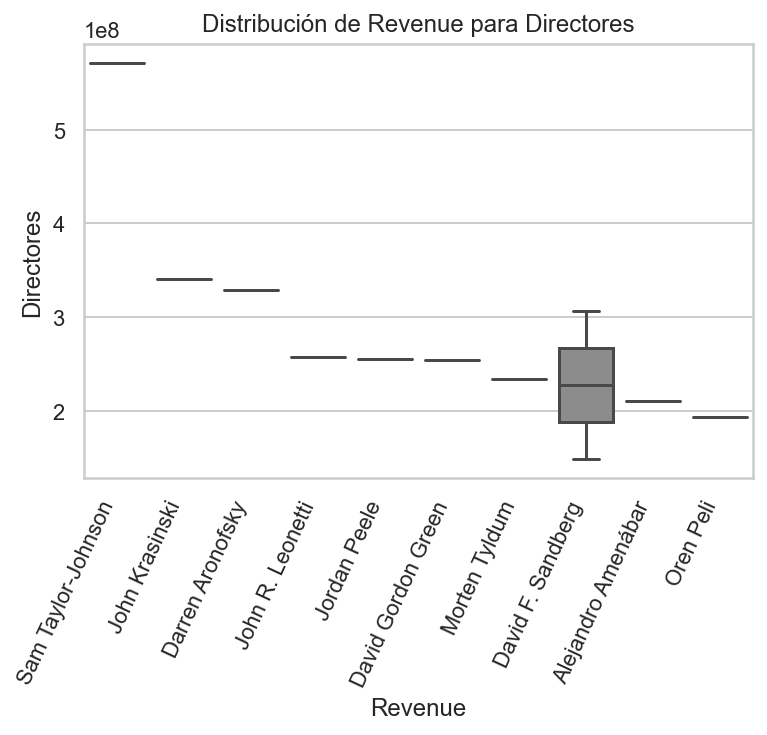

In [54]:
#Graficar un boxplot con la lista de los 10 directores mas destacados
sns.boxplot(x='name', y='revenue', data=directores_df, order=ordered_directores[:10])

plt.xlabel('Revenue')
plt.ylabel('Directores')
plt.title('Distribución de Revenue para Directores')

plt.xticks(rotation=65, ha='right')

plt.show()

Se observa que, también para este tipo de películas, la distribución de las recaudaciones está sesgada.

#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 31</font> 

 Obtener los 10 directores que han generado una mayor cantidad de ingresos medios por película, y dibujar un gráfico de barras que muestre esta información. Por comodidad, este ejercicio puede hacerse en dos pasos:
    
* Crear una *Serie* denominada `best_directors` que contenga los nombres de los 10 directores y, junto a cada uno de ellos, la recaudación media de sus películas. 

* Visualizar el contenido de `best_directors`. Al ser una serie, es necesario utilizar una función de bajo nivel de *seaborn* (`sns.barplot()`), y pasarle directamente el índice y valores a `x` e `y`.


In [55]:
#Crear una lista de los directores mas destacados por la media de revenue
best_directors = directores_df.groupby('name')['revenue'].mean().sort_values(ascending=False).index.tolist()
best_directors = best_directors[:10];
print(best_directors)

['Sam Taylor-Johnson', 'John Krasinski', 'Darren Aronofsky', 'John R. Leonetti', 'Jordan Peele', 'David Gordon Green', 'Morten Tyldum', 'David F. Sandberg', 'Alejandro Amenábar', 'Oren Peli']


In [56]:
# Calcular la media de revenue por película para cada director
medias_best_director = directores_df.groupby('name')['revenue'].mean().reset_index()

# Crear un diccionario para mapear los nombres de los directores a su posición en la lista best_directors
director_position = {director: position for position, director in enumerate(best_directors)}

# Agregar una columna 'director_position' al DataFrame medias_por_director
medias_best_director['director_position'] = medias_best_director['name'].map(director_position)

# Ordenar el DataFrame en base a la posición de los directores en la lista best_directors
medias_por_director_sorted = medias_best_director.sort_values(by='director_position').drop('director_position', axis=1)

# Mostrar el DataFrame ordenado
print(medias_por_director_sorted)

                   name      revenue
154  Sam Taylor-Johnson  571006128.0
93       John Krasinski  340677200.0
35     Darren Aronofsky  329398046.0
95     John R. Leonetti  257047661.0
98         Jordan Peele  255407969.0
..                  ...          ...
175      William Eubank    2665322.0
176    William Friedkin    3665069.0
177         Woody Allen   85306374.0
178        Yeon Sang-ho   87547518.0
179    Yorgos Lanthimos     110197.0

[180 rows x 2 columns]


In [57]:
top_10_mean_revenues = medias_por_director_sorted['revenue'].head(10).tolist()
print(top_10_mean_revenues)

[571006128.0, 340677200.0, 329398046.0, 257047661.0, 255407969.0, 253688035.0, 233555708.0, 227692359.5, 209947037.0, 193355800.0]


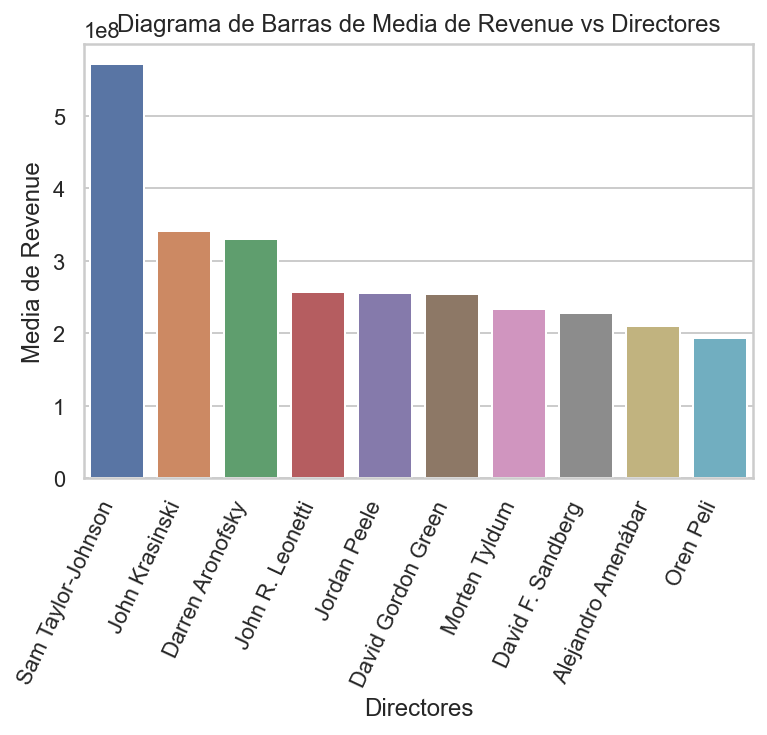

In [58]:
sns.set(style="whitegrid")

# Crear el gráfico de barras
sns.barplot(x=best_directors, y=top_10_mean_revenues)

plt.xlabel('Directores')
plt.ylabel('Media de Revenue')
plt.title('Diagrama de Barras de Media de Revenue vs Directores')

plt.xticks(rotation=65, ha='right')

plt.show()

#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 32</font> 

  Mostrar las películas dirigidas por el director que encabeza este ránking (almacenarlas en el `DataFrame` `movies_director`).

In [59]:
movies_director = directores_df[directores_df['name'].str.contains(best_directors[0], case=False, na=False)]
movies_director

,people_id,rol,name,popularity_per,imdb_id,gender,title,avg_rating,num_votes,budget,revenue,popularity_mov,release_year
movie_id,,,,,,,,,,,,,
tt2322441,1137903,director,Sam Taylor-Johnson,0.741,nm0853374,1,Fifty Shades of Grey,4.1,295447,4000000,571006128,74.429,2015


Podemos mostrar el cartel de la película que ha catapultado al éxito (al menos económico) a este director.

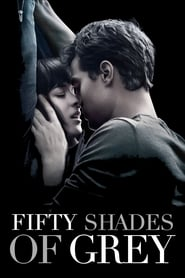

In [60]:
from IPython.display import Image
import requests
import json


token = 'e76c7dcc971fff48c23b33860fbf9b15'

language = 'en_US'  # 'es_ES' para español.
params = {'api_key':token, 'languaje':language}

movie_id = movies_director.index[0]
response = requests.get('https://api.themoviedb.org/3/movie/'+movie_id, params=params)
mov_data = response.json()

Image('http://image.tmdb.org/t/p/w185'+mov_data['poster_path'])

Un modo quizá más justo de calcular la rentabilidad de una película es el ratio `revenue`/`budget` (para obtener este dato, es necesario considerar solamente las películas con `revenue>0` y `budget>0`, pero en primer apartado se eliminaron las que no cumplían la condición).


#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 33</font> 

  Obtener los 10 directores que han generado un mayor beneficio según este criterio. Igual que anteriormente, almacenar el resultado de la consulta en una *Serie* denominada `best_directors` y mostrar una gráfica, similar a la anterior, con esta información. 

In [61]:
# Calcular el ratio "revenue/budget" y agregarlo como una nueva columna
directores_df['revenue_budget_ratio'] = directores_df['revenue'] / directores_df['budget']

# Ordenar el DataFrame por el ratio de forma descendente
directores_df = directores_df.sort_values(by='revenue_budget_ratio', ascending=False)

# Obtener las 10 primeras filas con los ratios más altos y los nombres de los directores
top_10_ratios = directores_df[['name', 'revenue_budget_ratio']].head(10)

# Obtener la lista de los 10 nombres de directores con los ratios más altos
best_directors = top_10_ratios['name'].tolist()

# Obtener la lista de los 10 ratios más altos
top_10_ratios_values = top_10_ratios['revenue_budget_ratio'].tolist()

# Imprimir las listas
print("Los 10 ratios 'revenue/budget' más altos:")
print(top_10_ratios_values)
print("\nLos 10 directores con los ratios más altos:")
print(best_directors)

Los 10 ratios 'revenue/budget' más altos:
[12890.386666666667, 420.52272307692306, 142.751532, 86.5930575, 77.91942857142857, 66.265218, 64.67276666666666, 62.88209, 59.17067733333333, 56.757326444444445]

Los 10 directores con los ratios más altos:
['Oren Peli', 'Chris Kentis', 'Sam Taylor-Johnson', 'James Wan', 'Shane Carruth', 'Aneesh Chaganty', 'James Wan', 'Levan Gabriadze', 'Tod Williams', 'Jordan Peele']


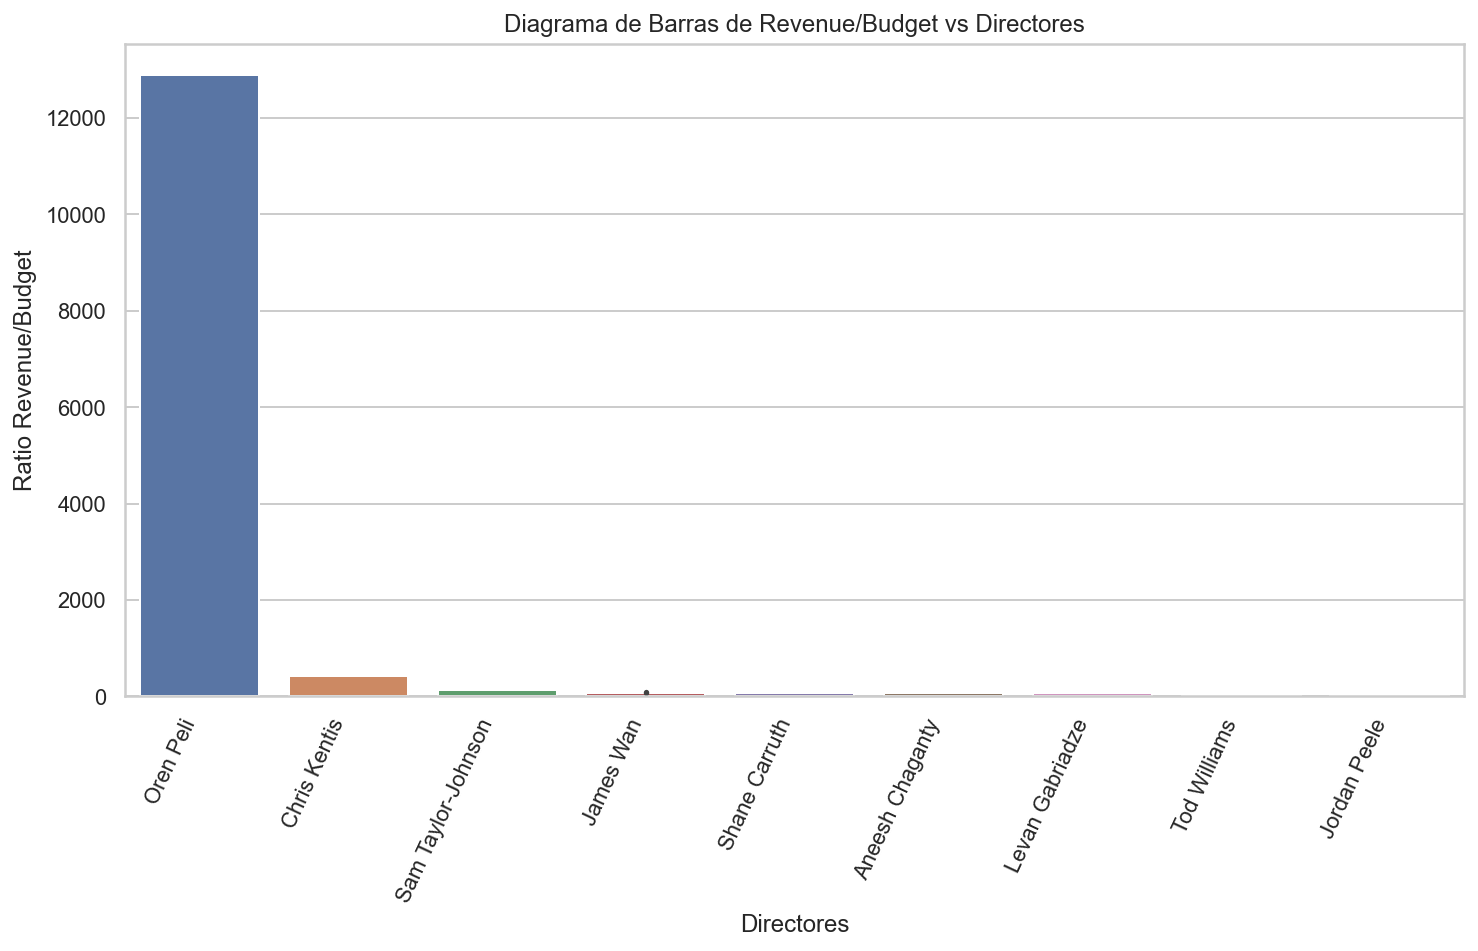

In [62]:
plt.figure(figsize=(12,6))

sns.set(style="whitegrid")

# Crear el gráfico de barras
sns.barplot(x=best_directors, y=top_10_ratios_values)

plt.xlabel('Directores')
plt.ylabel('Ratio Revenue/Budget')
plt.title('Diagrama de Barras de Revenue/Budget vs Directores')

plt.xticks(rotation=65, ha='right')

plt.show()

#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 34</font> 

  En este sentido, hay un director que destaca sobre muy por encima de los demás.  Mostrar las películas dirigidas por este director (almacenarlas en el `DataFrame` `movies_director`).

In [63]:
movies_director = directores_df[directores_df['name'] == best_directors[0]]
movies_director

,people_id,rol,name,popularity_per,imdb_id,gender,title,avg_rating,num_votes,budget,revenue,popularity_mov,release_year,revenue_budget_ratio
movie_id,,,,,,,,,,,,,,
tt1179904,90591,director,Oren Peli,0.6,nm2305431,2,Paranormal Activity,6.3,219321,15000,193355800,40.859,2009,12890.386667


También se puede mostrar el cartel de esta película.

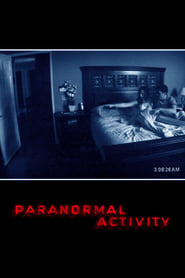

In [64]:
movie_id = movies_director.index[0]
response = requests.get('https://api.themoviedb.org/3/movie/'+movie_id, params=params)
mov_data = response.json()

Image('http://image.tmdb.org/t/p/w185'+mov_data['poster_path'])


En relación con los directores, la única información disponible (aparte de sus nombres) es su popularidad. Vamos a explorar si ésta repercute de algún modo en los ingresos de sus películas o incluso en su valoración (o viceversa).

#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 35</font> 

 Elaborar una gráfica `sns.jointplot` para comprobar si existe correlación entre los ingresos de las películas y su popularidad (popularidad del director según el enunciado anterior). 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> Para sacar información más representativa, pueden considerarse solamente aquellos casos en los que la popularidad sea mayor que cero; además solamente hay que considerar aquellos en los que `df_movie_low_people['rol']=='director'`. Por tanto, se han de utilizar 2 condiciones.

</div>

In [65]:
#Aplicar las condiciones que da el ejericio
directores_df = df_movie_people_low[df_movie_people_low['rol']=='director']
directores_df = directores_df[directores_df['popularity_per']>0]

#Eliminar indices duplicados (peliculas cuplicadas) del dataframe
directores_df = directores_df[~directores_df.index.duplicated(keep='first')]

directores_df.head(10)

,people_id,rol,name,popularity_per,imdb_id,gender,title,avg_rating,num_votes,budget,revenue,popularity_mov,release_year
movie_id,,,,,,,,,,,,,
tt0166924,5602,director,David Lynch,3.721,nm0000186,2,Mulholland Dr.,8.0,317360,15000000,20117339,16.706,2001
tt0183649,5572,director,Joel Schumacher,1.605,nm0001708,2,Phone Booth,7.0,249335,13000000,97837138,13.689,2002
tt0209144,525,director,Christopher Nolan,8.808,nm0634240,2,Memento,8.4,1112189,9000000,39723096,21.814,2000
tt0211443,69579,director,James Isaac,0.600,nm0410494,2,Jason X,4.4,50261,11000000,16951798,31.873,2001
tt0219699,7623,director,Sam Raimi,2.436,nm0000600,2,The Gift,6.6,62933,10000000,12008642,14.063,2000
tt0230600,19840,director,Alejandro Amenábar,1.653,nm0024622,2,The Others,7.6,334157,17000000,209947037,18.656,2001
tt0242423,56591,director,Danny Leiner,0.766,nm0500444,2,"Dude, Where's My Car?",5.5,133655,13000000,73180723,11.344,2000
tt0245712,223,director,Alejandro González Iñárritu,1.747,nm0327944,2,Amores Perros,8.1,221408,2000000,20908467,20.260,2000
tt0246578,1577,director,Richard Kelly,1.049,nm0446819,2,Donnie Darko,8.0,733940,6000000,6979093,21.535,2001


<Figure size 864x432 with 0 Axes>

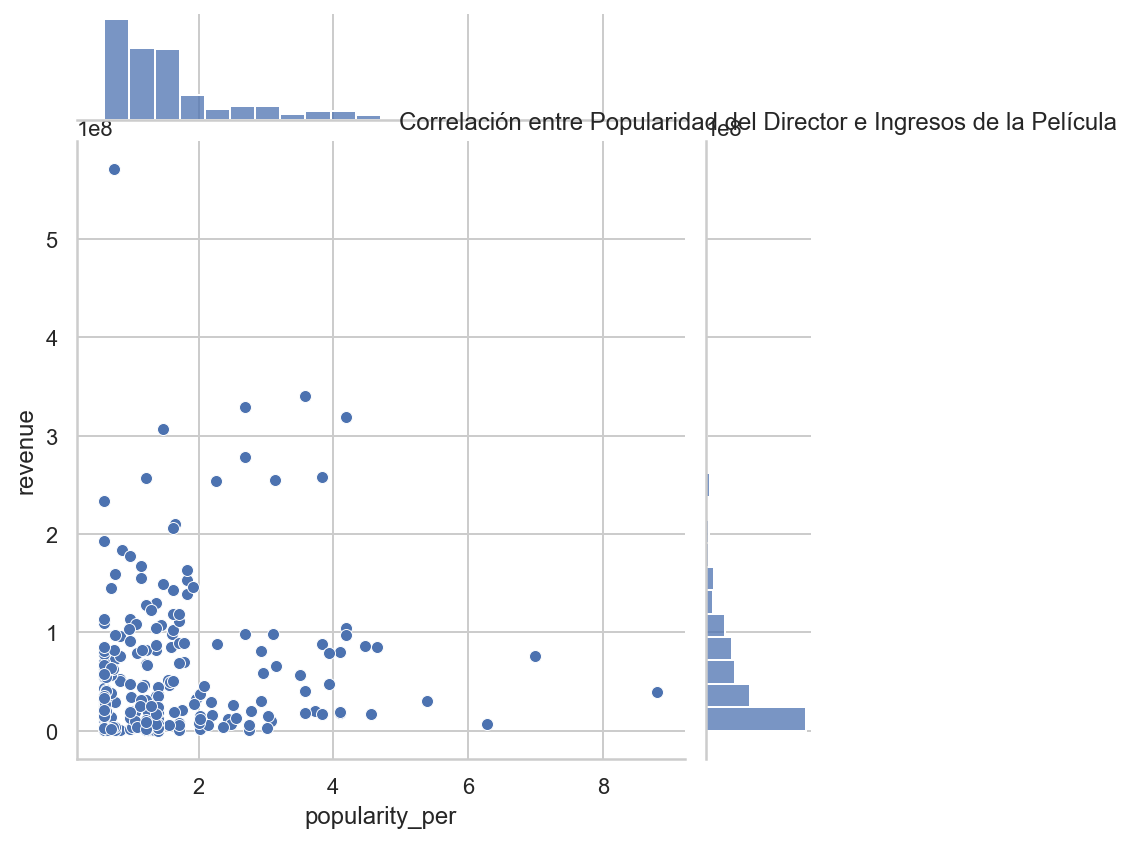

In [66]:
# Crear un gráfico sns.jointplot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Utilizar sns.jointplot para crear el gráfico
sns.jointplot(x='popularity_per', y='revenue', data=directores_df, kind='scatter')

# Configurar etiquetas y título
plt.xlabel('Popularidad del Director')
plt.ylabel('Ingresos de la Película')
plt.title('Correlación entre Popularidad del Director e Ingresos de la Película')

# Mostrar el gráfico
plt.show()

#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 36</font> 

  Cuantificar esta correlación mediante `DataFrame.corr()`.

In [67]:
# Calcular la correlación entre 'popularity_per' y 'revenue'
correlacion = directores_df['popularity_per'].corr(directores_df['revenue'])

# Imprimir el valor de correlación
print(f"Correlación entre Popularidad del Director y Ingresos de la Película: {correlacion}")

Correlación entre Popularidad del Director y Ingresos de la Película: 0.0929081134848353


Parece que la información relativa a la popularidad del director no tiene correlación con la recaudación de las películas. 

<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---

<a id="section42"></a>
### <font color="#7F000E">4.2 Reparto </font>
<br>

Una vez estudiados los directores, procederemos a estudiar el reparto.  En este caso, se comenzará qué actores o actrices participan en películas con más ingresos.     

#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 37</font> 

  Obtener los nombres de los 20 actores/actrices cuyas películas generan, por término medio, una mayor cantidad de ingresos. Dibujar un gráfico de barras que muestre esta información (utilizar la paleta `flare`).

Text(0.5, 1.0, 'Los 20 Actores con Mayor Ingreso Promedio por Película')

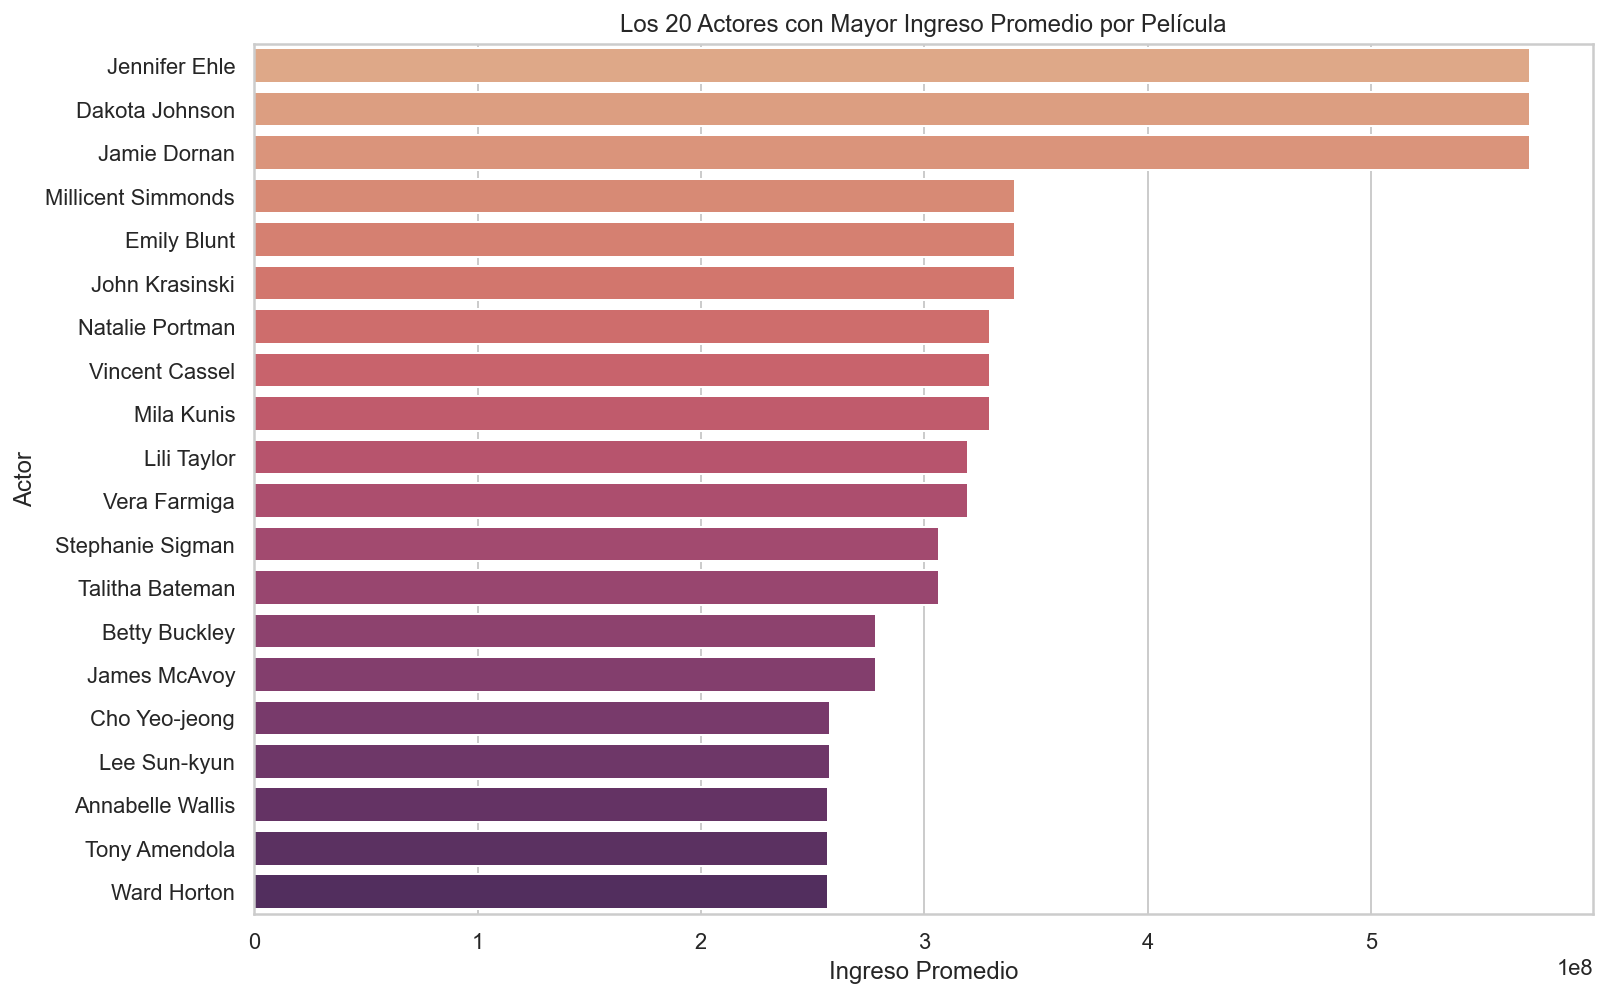

In [68]:
#Aplicar las condiciones que da el ejericio
actores_df = df_movie_people_low[df_movie_people_low['rol']=='cast']

# Agrupar por el nombre del actor y calcular el ingreso promedio
ingreso_promedio_por_actor = actores_df.groupby('name')['revenue'].mean()

# Ordenar en orden descendente y seleccionar los 20 mejores actores por ingreso promedio
top_20_actores = ingreso_promedio_por_actor.sort_values(ascending=False).head(20)

# Crear un DataFrame a partir de los 20 mejores actores
df_top_20_actores = pd.DataFrame({'Actor': top_20_actores.index, 'Ingreso Promedio': top_20_actores.values})

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras utilizando la paleta "flare"
sns.barplot(x='Ingreso Promedio', y='Actor', data=df_top_20_actores, palette='flare')

# Configurar etiquetas y título
plt.xlabel('Ingreso Promedio')
plt.ylabel('Actor')
plt.title('Los 20 Actores con Mayor Ingreso Promedio por Película')

Llama la atención que en este segmento de películas (coste más reducido, y terror/misterio/*thriller*) son mayormente actrices quienes están vinculadas a una mayor generación de ingresos. Este fenómeno es interesante también en relación al objetivo inicial con que se planteó el análisis, ya que sería indicativo de cómo habría que formar el reparto.
 
#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 38</font> 

 Visualizar la distribución de la recaudación para cada sexo en una misma gráfica. Para ello, es necesario escoger las filas de `df_movie_people_low` en las que `gender` sea 1 (mujer) o 2 (hombre), y `rol` sea `cast`.

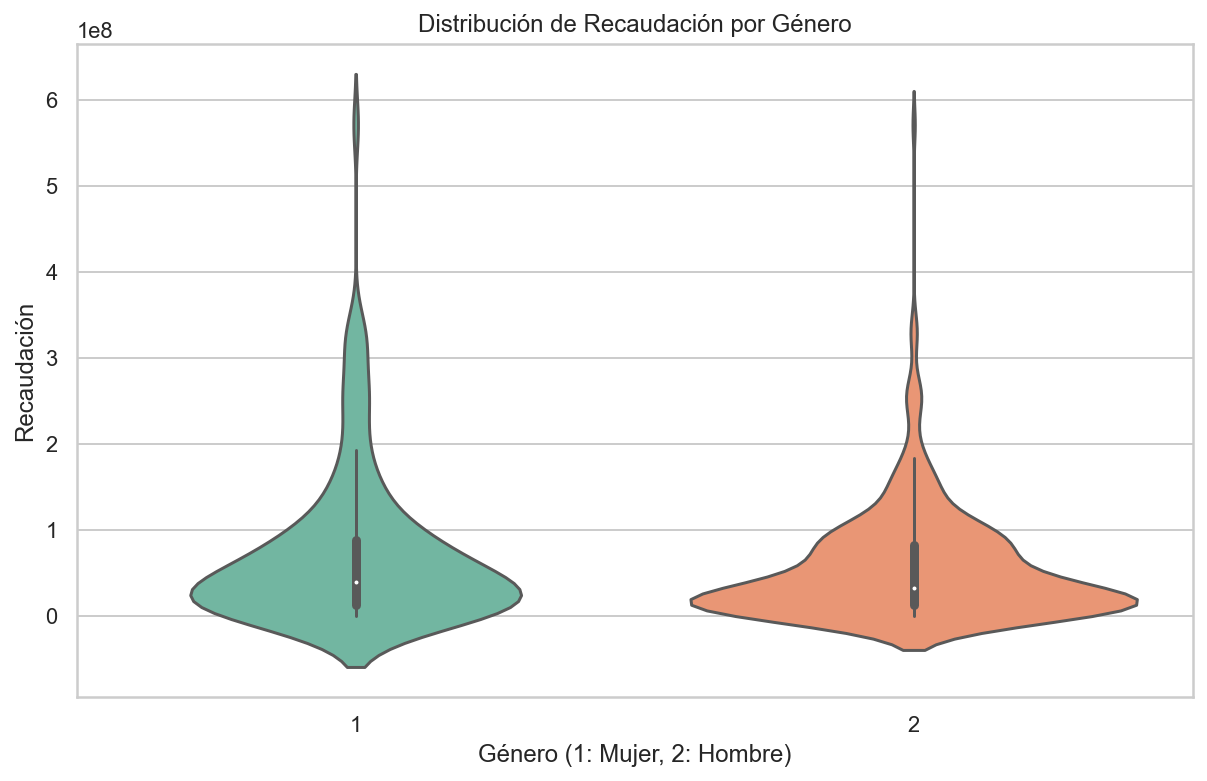

In [69]:
#Aplicar las condiciones que da el ejercicio
actores_df = df_movie_people_low[df_movie_people_low['rol']=='cast']
actores_df = actores_df[actores_df['gender'].isin([1, 2])]

sns.set(style="whitegrid")

# Crear un gráfico de violín para visualizar la distribución de la recaudación por género
plt.figure(figsize=(10, 6))

# Utilizar sns.violinplot para crear el gráfico
sns.violinplot(x='gender', y='revenue', data=actores_df, palette='Set2')

# Configurar etiquetas y título
plt.xlabel('Género (1: Mujer, 2: Hombre)')
plt.ylabel('Recaudación')
plt.title('Distribución de Recaudación por Género')

plt.show()

Efectivamente, se percibe que, a pesar de que aparecen más actores que actrices, parece que en las películas con el presupuesto más alto la no hay diferencia o incluso aparecen más actrices que actores. 

Por último, también en relación al reparto, vamos a explorar si la popularidad de los actores tiene relación con la recaudación de las películas.

#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 39</font> 

 Elaborar una gráfica `sns.jointplot` para comprobar si existe correlación entre los ingresos de las películas la popularidad del reparto.


In [70]:
#Aplicar las condiciones que da el ejercicio
actores_df = df_movie_people_low[df_movie_people_low['rol']=='cast']
actores_df = actores_df[actores_df['popularity_per']>0]

#Se inndica que la combinacion de 'movie_id' y 'people_id' seran el nuevo indice
actores_df = actores_df.reset_index()
actores_df = actores_df.set_index(['movie_id', 'people_id'])
actores_df.head()

rol               name  popularity_per    imdb_id  \
movie_id  people_id                                                       
tt0166924 15009      cast     Justin Theroux           4.417  nm0857620   
          3489       cast        Naomi Watts          19.082  nm0915208   
          15007      cast      Laura Harring           8.413  nm0005009   
tt0183649 72466      cast      Colin Farrell           7.164  nm0268199   
          2628       cast  Kiefer Sutherland           4.874  nm0000662   

                     gender           title  avg_rating  num_votes    budget  \
movie_id  people_id                                                            
tt0166924 15009           2  Mulholland Dr.         8.0     317360  15000000   
          3489            1  Mulholland Dr.         8.0     317360  15000000   
          15007           1  Mulholland Dr.         8.0     317360  15000000   
tt0183649 72466           2     Phone Booth         7.0     249335  13000000   
          2628            2     Phone Booth         7.0     249335  13000000   

                      revenue  popularity_mov  release_year  
movie_id  people_id                                          
tt0166924 15009      20117339          16.706          2001  
          3489       20117339          16.706          2001  
          15007      20117339          16.706          2001  
tt0183649 72466      97837138          13.689          2002  
          2628       97837138          13.689          2002

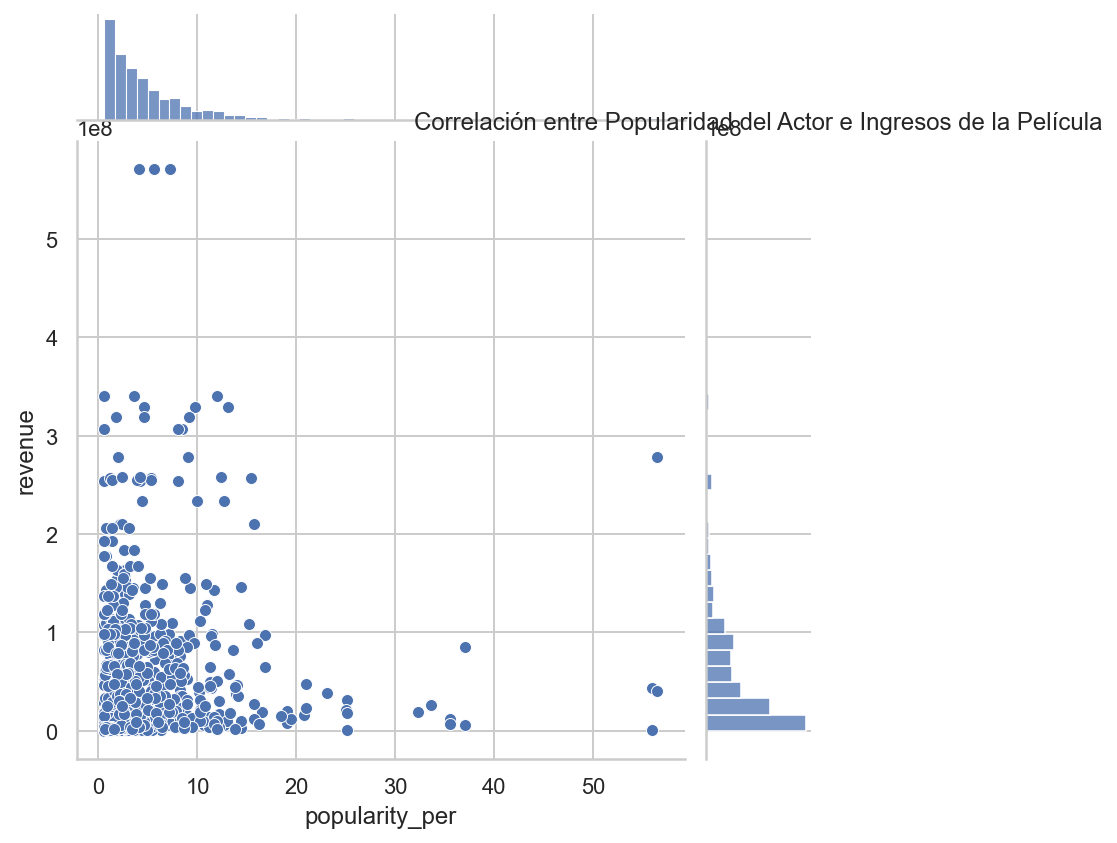

In [71]:
# Crear un gráfico sns.jointplot
sns.set(style="whitegrid")
#plt.figure(figsize=(12, 6))

# Utilizar sns.jointplot para crear el gráfico
sns.jointplot(x='popularity_per', y='revenue', data=actores_df, kind='scatter')

# Configurar etiquetas y título
plt.xlabel('Popularidad del Actor')
plt.ylabel('Ingresos de la Película')
plt.title('Correlación entre Popularidad del Actor e Ingresos de la Película')

plt.show()

#### <font color="#7F000E"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Ejercicio 40</font> 

 Cuantificar esta relación mediante `corr()`.

In [72]:
# Calcular la correlación entre "revenue" y "popularity_per"
correlacion = actores_df['revenue'].corr(actores_df['popularity_per'])

# Imprimir el valor de correlación
print(f"Correlación entre Ingresos y Popularidad del Actor: {correlacion}")

Correlación entre Ingresos y Popularidad del Actor: -6.682972419864798e-05


Al igual que ocurría con el director, no se aprecia correlación en este caso. En la propia gráfica se puede apreciar que las películas con ingresos más altos la popularidad está por debajo de 20.


<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---

<a id="section5"></a>
## <font color="#7F000E"> 5. Conclusión
<br>

En esta parte del trabajo se partía de dos bases de datos de películas y gente, y el objetivo estudiar qué factores están más relacionados con el éxito de una película, que se mide por los ingresos que genera. Desde el principio, ha quedado claro que el presupuesto es el factor más importante,  que los géneros en que más dinero se gasta en la producción son la animación, fantasía, etc., y que éstos son también los que más recaudación obtienen. 
<br>

No obstante se ha limitado el estudio al periodo actual y al (relativamente bajo) presupuesto disponible. En ese sentido, se ha comprobado que las películas más rentables son aquellas que pertenecen a los géneros de terror, suspense, etc. También se ha descubierto que películas como "Paranormal Activity" generan unos ingresos extraordinariamente altos en proporción con la inversión. Con respecto a los actores, se ha comprobado que los ligados a películas de este género con más ganancias son, en su mayoría, mujeres. 
<br>

Por último, la información relativa a popularidad de directores y actores __no__ parece muy relevante. 


<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---

<a id="section6"></a>
## <font color="#7F000E"> 6. Trabajo adicional (optativo)
<br>
Como trabajo adicional se propone llevar algunas tareas adicionales de exploración. Una línea de trabajo podría consistir en un estudio más profundo de la popularidad. Llama la atención que parece que no tiene correlación con los ingresos. Sin embargo, hay actores y actrices conocidos que siempre participan en películas de alto presupuesto. 
    
    
    
Otra línea de trabajo (compleja) podría estar relacionada con la información de las palabras clave. ¿Cuales son las más utilizadas? ¿Cuales están ligadas a una mayor valoración media de las películas? Otra posibilidad puede ser el estudio de la repercusión de la popularidad en películas de alto prespuesto. O incluso la aparición de actores en determinado tipo de películas. Esta temática, no obstante, se tratará en el módulo correspondiente.

<div style="text-align: right">
<a href="#inicio"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#00586D"></i> </font></div>